In [1]:
import itertools as it
import os

from iterpop import iterpop as ip
import matplotlib as mpl
from matplotlib import pyplot as plt
from nbmetalog import nbmetalog as nbm
import numpy as np
import pandas as pd
from scipy import stats as scipy_stats
import seaborn as sns
from teeplot import teeplot as tp


In [2]:
# prints metadata about notebook runtime
nbm.print_metadata()


context: ci
hostname: fv-az1198-555
interpreter: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
nbcellexec: null
nbname: reconstructed-tree-phylometrics
nbpath: /home/runner/work/hstrat-evolutionary-inference/hstrat-evolutionary-inference/binder/reconstructed-tree-phylometrics.ipynb
revision: null
session: fbb7c821-3ad2-4cbd-b02b-c70b872fa6f4
timestamp: 2024-03-23T18:37:24Z00:00


IPython==8.13.0
keyname==0.5.2
yaml==6.0
iterpop==0.4.1
matplotlib==3.7.1
nbmetalog==0.2.6
numpy==1.21.6
pandas==1.3.5
scipy==1.7.3
seaborn==0.12.1
teeplot==0.5.0
re==2.2.1
comm==0.2.2
logging==0.5.1.2
psutil==5.9.8
zmq==24.0.1
json==2.0.9
ipykernel==6.29.3


In [3]:
df = pd.read_csv("https://osf.io/2xuyg/download")
dfdigest = np.bitwise_xor.reduce(
    pd.util.hash_pandas_object(df),
)
print("{:x}".format(dfdigest))
df


a78d74bbfd66538a


a  epoch                  mut_distn  \
0       consolidated-phylogeny      2      np.random.exponential   
1       consolidated-phylogeny      2      np.random.exponential   
2       consolidated-phylogeny      2      np.random.exponential   
3       consolidated-phylogeny      2      np.random.exponential   
4       consolidated-phylogeny      2      np.random.exponential   
...                        ...    ...                        ...   
109195      reconstructed-tree      2  np.random.standard_normal   
109196      reconstructed-tree      2  np.random.standard_normal   
109197      reconstructed-tree      2  np.random.standard_normal   
109198      reconstructed-tree      2  np.random.standard_normal   
109199      reconstructed-tree      2  np.random.standard_normal   

        num_generations  num_islands  num_niches  p_island_migration  \
0                 32768         1024           4                0.01   
1                 32768         1024           4                0.01   
2                 32768         1024           4                0.01   
3                 32768         1024           4                0.01   
4                 32768         1024           4                0.01   
...                 ...          ...         ...                 ...   
109195            32768            1           4                0.01   
109196            32768            1           4                0.01   
109197            32768            1           4                0.01   
109198            32768            1           4                0.01   
109199            32768            1           4                0.01   

        p_niche_invasion  population_size  replicate  ...  \
0           3.051758e-08            32768         36  ...   
1           3.051758e-08            32768         37  ...   
2           3.051758e-08            32768          6  ...   
3           3.051758e-08            32768         20  ...   
4           3.051758e-08            32768         34  ...   
...                  ...              ...        ...  ...   
109195      3.051758e-08            32768         10  ...   
109196      3.051758e-08            32768         16  ...   
109197      3.051758e-08            32768          1  ...   
109198      3.051758e-08            32768         10  ...   
109199      3.051758e-08            32768         36  ...   

        variance_pairwise_distance  variance_pairwise_distance_branch_only  \
0                    287183.364388                               14.043593   
1                    348528.257947                               14.320022   
2                    229751.399043                               13.258748   
3                    228292.620676                               10.335814   
4                    245030.093866                               12.832336   
...                            ...                                     ...   
109195                   24.562416                               24.562416   
109196                   17.300466                               17.300466   
109197                   88.702783                               88.702783   
109198                   25.685331                               25.685331   
109199                   23.312447                               23.312447   

        mrca_depth  sackin_index mean_evolutionary_distinctiveness  \
0                0         27223                       1210.960392   
1                0         31933                       1056.875368   
2                0         28964                       1151.469136   
3                0         23933                       1289.021227   
4                0         26307                       1217.977803   
...            ...           ...                               ...   
109195           1          3305                         99.163609   
109196           0          2923                       1893.146789   
109197           1        717008               

In [4]:
# phylometrics whittled down to descriptive, non-redundant set
phylometrics = [
    #     'diversity',
    "colless_like_index",
    #     'average_depth',
    #     'average_origin_time',
    #     'average_origin_time_normalized',
    #     'max_depth',
    "mean_pairwise_distance",
    #     'mean_pairwise_distance_branch_only',
    #     'num_active',
    # "num_ancestors",
    "sum_distance",
    #     'num_outside',
    #     'num_roots',
    #     'num_taxa',
    #     'phylogenetic_diversity',
    #     'sum_pairwise_distance',
    #     'sum_pairwise_distance_branch_only',
    #     'total_orgs',
    #     'tree_size',
    #     'variance_pairwise_distance',
    #     'variance_pairwise_distance_branch_only',
    #     'mrca_depth',
    #     'sackin_index',
    "mean_evolutionary_distinctiveness",
    #     'sum_evolutionary_distinctiveness',
    #     'variance_evolutionary_distinctiveness',
]


In [5]:
methodological_variables = [
    "resolution",
]


In [6]:
evolutionary_variables = [
    "num_islands",
    "num_niches",
    "tournament_size",
    "p_niche_invasion",
]


In [7]:
sensitivity_analysis_variables = [
    "epoch",
    "mut_distn",
]


In [8]:
fixed_variables = [
    "num_generations",  # homogeneous (num generations per epoch)
    "p_island_migration",  # homogeneous
    "population_size",  # homogeneous
    "subsampling-fraction",  # only use 1.0
    "trie-postprocess",  # just use naive postprocessing for now
]


In [9]:
# ensure fixed variables
df = df[
    (df["p_island_migration"] == 0.01)
    & ((df["subsampling-fraction"] == 1.0) | df["subsampling-fraction"].isna())
    & ((df["trie-postprocess"] == "naive") | df["trie-postprocess"].isna())
].copy()

for fixed_variable in fixed_variables:
    assert len(df[fixed_variable].dropna().unique()) == 1

df


a  epoch                  mut_distn  \
0       consolidated-phylogeny      2      np.random.exponential   
1       consolidated-phylogeny      2      np.random.exponential   
2       consolidated-phylogeny      2      np.random.exponential   
3       consolidated-phylogeny      2      np.random.exponential   
4       consolidated-phylogeny      2      np.random.exponential   
...                        ...    ...                        ...   
109156      reconstructed-tree      2  np.random.standard_normal   
109158      reconstructed-tree      2  np.random.standard_normal   
109170      reconstructed-tree      2  np.random.standard_normal   
109171      reconstructed-tree      2  np.random.standard_normal   
109198      reconstructed-tree      2  np.random.standard_normal   

        num_generations  num_islands  num_niches  p_island_migration  \
0                 32768         1024           4                0.01   
1                 32768         1024           4                0.01   
2                 32768         1024           4                0.01   
3                 32768         1024           4                0.01   
4                 32768         1024           4                0.01   
...                 ...          ...         ...                 ...   
109156            32768            1           4                0.01   
109158            32768            1           4                0.01   
109170            32768            1           4                0.01   
109171            32768            1           4                0.01   
109198            32768            1           4                0.01   

        p_niche_invasion  population_size  replicate  ...  \
0           3.051758e-08            32768         36  ...   
1           3.051758e-08            32768         37  ...   
2           3.051758e-08            32768          6  ...   
3           3.051758e-08            32768         20  ...   
4           3.051758e-08            32768         34  ...   
...                  ...              ...        ...  ...   
109156      3.051758e-08            32768         25  ...   
109158      3.051758e-08            32768         19  ...   
109170      3.051758e-08            32768         17  ...   
109171      3.051758e-08            32768          3  ...   
109198      3.051758e-08            32768         10  ...   

        variance_pairwise_distance  variance_pairwise_distance_branch_only  \
0                    287183.364388                               14.043593   
1                    348528.257947                               14.320022   
2                    229751.399043                               13.258748   
3                    228292.620676                               10.335814   
4                    245030.093866                               12.832336   
...                            ...                                     ...   
109156                   86.927779                               86.927779   
109158                   41.519441                               41.519441   
109170                   72.132664                               72.132664   
109171                   29.663459                               29.663459   
109198                   25.685331                               25.685331   

        mrca_depth  sackin_index mean_evolutionary_distinctiveness  \
0                0         27223                       1210.960392   
1                0         31933                       1056.875368   
2                0         28964                       1151.469136   
3                0         23933                       1289.021227   
4                0         26307                       1217.977803   
...            ...           ...                               ...   
109156           1        724151                          6.498184   
109158           1        564013                          4.646164   
109170           1        685644               

In [10]:
# exclude extraneous variable values
df = df[(df["a"] != "consolidated-phylogeny")].copy()

df


a  epoch                  mut_distn  \
50      collapsed-phylogeny      7  np.random.standard_normal   
51      collapsed-phylogeny      7  np.random.standard_normal   
52      collapsed-phylogeny      7  np.random.standard_normal   
53      collapsed-phylogeny      7  np.random.standard_normal   
54      collapsed-phylogeny      7  np.random.standard_normal   
...                     ...    ...                        ...   
109156   reconstructed-tree      2  np.random.standard_normal   
109158   reconstructed-tree      2  np.random.standard_normal   
109170   reconstructed-tree      2  np.random.standard_normal   
109171   reconstructed-tree      2  np.random.standard_normal   
109198   reconstructed-tree      2  np.random.standard_normal   

        num_generations  num_islands  num_niches  p_island_migration  \
50                32768         1024           4                0.01   
51                32768         1024           4                0.01   
52                32768         1024           4                0.01   
53                32768         1024           4                0.01   
54                32768         1024           4                0.01   
...                 ...          ...         ...                 ...   
109156            32768            1           4                0.01   
109158            32768            1           4                0.01   
109170            32768            1           4                0.01   
109171            32768            1           4                0.01   
109198            32768            1           4                0.01   

        p_niche_invasion  population_size  replicate  ...  \
50          3.051758e-06            32768         20  ...   
51          3.051758e-06            32768          4  ...   
52          3.051758e-06            32768         41  ...   
53          3.051758e-06            32768         47  ...   
54          3.051758e-06            32768         15  ...   
...                  ...              ...        ...  ...   
109156      3.051758e-08            32768         25  ...   
109158      3.051758e-08            32768         19  ...   
109170      3.051758e-08            32768         17  ...   
109171      3.051758e-08            32768          3  ...   
109198      3.051758e-08            32768         10  ...   

        variance_pairwise_distance  variance_pairwise_distance_branch_only  \
50                       30.794793                               30.794793   
51                       27.305316                               27.305316   
52                       26.027820                               26.027820   
53                       27.705938                               27.705938   
54                       28.664163                               28.664163   
...                            ...                                     ...   
109156                   86.927779                               86.927779   
109158                   41.519441                               41.519441   
109170                   72.132664                               72.132664   
109171                   29.663459                               29.663459   
109198                   25.685331                               25.685331   

        mrca_depth  sackin_index mean_evolutionary_distinctiveness  \
50               1        591511                         78.882446   
51               1        570110                         81.707306   
52               0        548025                         83.217377   
53               0        559117                         86.538544   
54               1        583153                         76.277557   
...            ...           ...                               ...   
109156           1        724151                          6.498184   
109158           1        564013                          4.646164   
109170           1        685644                          5.576447   
109171    

In [11]:
df["num_niches"].unique()


array([4, 8, 1])

In [12]:
df["num_islands"].unique()


array([1024,    1])

In [13]:
df["tournament_size"].unique()


array([2, 4, 1])

In [14]:
df["a"].unique()


array(['collapsed-phylogeny', 'reconstructed-tree'], dtype=object)

In [15]:
df["regime"] = df.apply(
    lambda row: {
        (1, 1, 2, 3.0517578125e-08): "plain",
        (1, 1, 1, 3.0517578125e-08): "weak selection",
        (1, 1, 4, 3.0517578125e-08): "strong selection",
        (1, 4, 2, 3.0517578125e-06): "weak ecology",
        (1, 4, 2, 3.0517578125e-08): "ecology",
        (1, 8, 2, 3.0517578125e-08): "rich ecology",
        (1024, 1, 2, 3.0517578125e-08): "spatial structure",
    }.get(
        tuple(
            row[
                [
                    "num_islands",
                    "num_niches",
                    "tournament_size",
                    "p_niche_invasion",
                ]
            ]
        ),
        np.nan,  # default
    ),
    axis="columns",
)
df = df.dropna(axis="index", subset=["regime"]).copy()
df["regime"].unique()


array(['weak ecology', 'rich ecology', 'spatial structure', 'ecology',
       'weak selection', 'strong selection', 'plain'], dtype=object)

In [16]:
df[df["a"] == "collapsed-phylogeny"]["regime"].unique()


array(['weak ecology', 'ecology', 'weak selection', 'plain',
       'strong selection', 'spatial structure', 'rich ecology'],
      dtype=object)

In [17]:
df["quality"] = df.apply(
    lambda row: {
        ("reconstructed-tree", 3.0): "33% resolution",
        ("reconstructed-tree", 10.0): "10% resolution",
        ("reconstructed-tree", 30.0): "3% resolution",
        ("reconstructed-tree", 100.0): "1% resolution",
        ("collapsed-phylogeny", 0): "perfect resolution",
    }.get(
        tuple(row[["a", "resolution"]].fillna(0)),
        np.nan,  # default
    ),
    axis="columns",
)
df = df.dropna(axis="index", subset=["quality"]).copy()
df["quality"].unique()


array(['perfect resolution', '10% resolution', '33% resolution',
       '3% resolution', '1% resolution'], dtype=object)

# Phylometrics by Regime, Reconstructed Data


In [18]:
melted_df = df.melt(
    id_vars=evolutionary_variables
    + methodological_variables
    + sensitivity_analysis_variables
    + ["regime", "a", "quality"],
    value_vars=phylometrics,
)
melted_df["phylometric"] = melted_df["variable"]
melted_df


num_islands  num_niches  tournament_size  p_niche_invasion  resolution  \
0                1           4                2      3.051758e-06         NaN   
1                1           4                2      3.051758e-06         NaN   
2                1           4                2      3.051758e-06         NaN   
3                1           4                2      3.051758e-06         NaN   
4                1           4                2      3.051758e-06         NaN   
...            ...         ...              ...               ...         ...   
41995            1           4                2      3.051758e-08         3.0   
41996            1           4                2      3.051758e-08       100.0   
41997            1           4                2      3.051758e-08        30.0   
41998            1           4                2      3.051758e-08       100.0   
41999            1           4                2      3.051758e-08        30.0   

       epoch                  mut_distn        regime                    a  \
0          7  np.random.standard_normal  weak ecology  collapsed-phylogeny   
1          7  np.random.standard_normal  weak ecology  collapsed-phylogeny   
2          7  np.random.standard_normal  weak ecology  collapsed-phylogeny   
3          7  np.random.standard_normal  weak ecology  collapsed-phylogeny   
4          7  np.random.standard_normal  weak ecology  collapsed-phylogeny   
...      ...                        ...           ...                  ...   
41995      2  np.random.standard_normal       ecology   reconstructed-tree   
41996      2  np.random.standard_normal       ecology   reconstructed-tree   
41997      2  np.random.standard_normal       ecology   reconstructed-tree   
41998      2  np.random.standard_normal       ecology   reconstructed-tree   
41999      2  np.random.standard_normal       ecology   reconstructed-tree   

                  quality                           variable          value  \
0      perfect resolution                 colless_like_index  346237.149255   
1      perfect resolution                 colless_like_index  393531.329296   
2      perfect resolution                 colless_like_index  358279.386159   
3      perfect resolution                 colless_like_index  435516.244222   
4      perfect resolution                 colless_like_index  378408.625158   
...                   ...                                ...            ...   
41995      33% resolution  mean_evolutionary_distinctiveness       4.854187   
41996       1% resolution  mean_evolutionary_distinctiveness       4.748322   
41997       3% resolution  mean_evolutionary_distinctiveness       5.063843   
41998       1% resolution  mean_evolutionary_distinctiveness       6.498184   
41999       3% resolution  mean_evolutionary_distinctiveness       5.576447   

                             phylometric  
0                     colless_like_index  
1                     colless_like_index  
2                     colless_like_index  
3                     colless_like_index  
4                     colless_like_index  
...                                  ...  
41995  mean_evolutionary_distinctiveness  
41996  mean_evolutionary_distinctiveness  
41997  mean_evolutionary_distinctiveness  
41998  mean_evolutionary_distinctiveness  
41999  mean_evolutionary_distinctiveness  

[42000 rows x 13 columns]

teeplots/./col=phylometric+epoch=0+mut_distn=np.random.exponential+row=regime+viz=barplot+x=value+y=quality+ext=.pdf


teeplots/./col=phylometric+epoch=0+mut_distn=np.random.exponential+row=regime+viz=barplot+x=value+y=quality+ext=.png


teeplots/./col=phylometric+epoch=0+mut_distn=np.random.standard_normal+row=regime+viz=barplot+x=value+y=quality+ext=.pdf


teeplots/./col=phylometric+epoch=0+mut_distn=np.random.standard_normal+row=regime+viz=barplot+x=value+y=quality+ext=.png


teeplots/./col=phylometric+epoch=2+mut_distn=np.random.exponential+row=regime+viz=barplot+x=value+y=quality+ext=.pdf


teeplots/./col=phylometric+epoch=2+mut_distn=np.random.exponential+row=regime+viz=barplot+x=value+y=quality+ext=.png


teeplots/./col=phylometric+epoch=2+mut_distn=np.random.standard_normal+row=regime+viz=barplot+x=value+y=quality+ext=.pdf


teeplots/./col=phylometric+epoch=2+mut_distn=np.random.standard_normal+row=regime+viz=barplot+x=value+y=quality+ext=.png


teeplots/./col=phylometric+epoch=7+mut_distn=np.random.exponential+row=regime+viz=barplot+x=value+y=quality+ext=.pdf


teeplots/./col=phylometric+epoch=7+mut_distn=np.random.exponential+row=regime+viz=barplot+x=value+y=quality+ext=.png


teeplots/./col=phylometric+epoch=7+mut_distn=np.random.standard_normal+row=regime+viz=barplot+x=value+y=quality+ext=.pdf


teeplots/./col=phylometric+epoch=7+mut_distn=np.random.standard_normal+row=regime+viz=barplot+x=value+y=quality+ext=.png


teeplots/./col=phylometric+epoch=0+mut_distn=np.random.exponential+row=regime+viz=boxplot+x=value+y=quality+ext=.pdf


teeplots/./col=phylometric+epoch=0+mut_distn=np.random.exponential+row=regime+viz=boxplot+x=value+y=quality+ext=.png


teeplots/./col=phylometric+epoch=0+mut_distn=np.random.standard_normal+row=regime+viz=boxplot+x=value+y=quality+ext=.pdf


teeplots/./col=phylometric+epoch=0+mut_distn=np.random.standard_normal+row=regime+viz=boxplot+x=value+y=quality+ext=.png


teeplots/./col=phylometric+epoch=2+mut_distn=np.random.exponential+row=regime+viz=boxplot+x=value+y=quality+ext=.pdf


teeplots/./col=phylometric+epoch=2+mut_distn=np.random.exponential+row=regime+viz=boxplot+x=value+y=quality+ext=.png


teeplots/./col=phylometric+epoch=2+mut_distn=np.random.standard_normal+row=regime+viz=boxplot+x=value+y=quality+ext=.pdf


teeplots/./col=phylometric+epoch=2+mut_distn=np.random.standard_normal+row=regime+viz=boxplot+x=value+y=quality+ext=.png


teeplots/./col=phylometric+epoch=7+mut_distn=np.random.exponential+row=regime+viz=boxplot+x=value+y=quality+ext=.pdf


teeplots/./col=phylometric+epoch=7+mut_distn=np.random.exponential+row=regime+viz=boxplot+x=value+y=quality+ext=.png


teeplots/./col=phylometric+epoch=7+mut_distn=np.random.standard_normal+row=regime+viz=boxplot+x=value+y=quality+ext=.pdf


teeplots/./col=phylometric+epoch=7+mut_distn=np.random.standard_normal+row=regime+viz=boxplot+x=value+y=quality+ext=.png


teeplots/./col=phylometric+epoch=0+mut_distn=np.random.exponential+row=regime+viz=violinplot+x=value+y=quality+ext=.pdf


teeplots/./col=phylometric+epoch=0+mut_distn=np.random.exponential+row=regime+viz=violinplot+x=value+y=quality+ext=.png


teeplots/./col=phylometric+epoch=0+mut_distn=np.random.standard_normal+row=regime+viz=violinplot+x=value+y=quality+ext=.pdf


teeplots/./col=phylometric+epoch=0+mut_distn=np.random.standard_normal+row=regime+viz=violinplot+x=value+y=quality+ext=.png


teeplots/./col=phylometric+epoch=2+mut_distn=np.random.exponential+row=regime+viz=violinplot+x=value+y=quality+ext=.pdf


teeplots/./col=phylometric+epoch=2+mut_distn=np.random.exponential+row=regime+viz=violinplot+x=value+y=quality+ext=.png


teeplots/./col=phylometric+epoch=2+mut_distn=np.random.standard_normal+row=regime+viz=violinplot+x=value+y=quality+ext=.pdf


teeplots/./col=phylometric+epoch=2+mut_distn=np.random.standard_normal+row=regime+viz=violinplot+x=value+y=quality+ext=.png


teeplots/./col=phylometric+epoch=7+mut_distn=np.random.exponential+row=regime+viz=violinplot+x=value+y=quality+ext=.pdf


teeplots/./col=phylometric+epoch=7+mut_distn=np.random.exponential+row=regime+viz=violinplot+x=value+y=quality+ext=.png


teeplots/./col=phylometric+epoch=7+mut_distn=np.random.standard_normal+row=regime+viz=violinplot+x=value+y=quality+ext=.pdf


teeplots/./col=phylometric+epoch=7+mut_distn=np.random.standard_normal+row=regime+viz=violinplot+x=value+y=quality+ext=.png


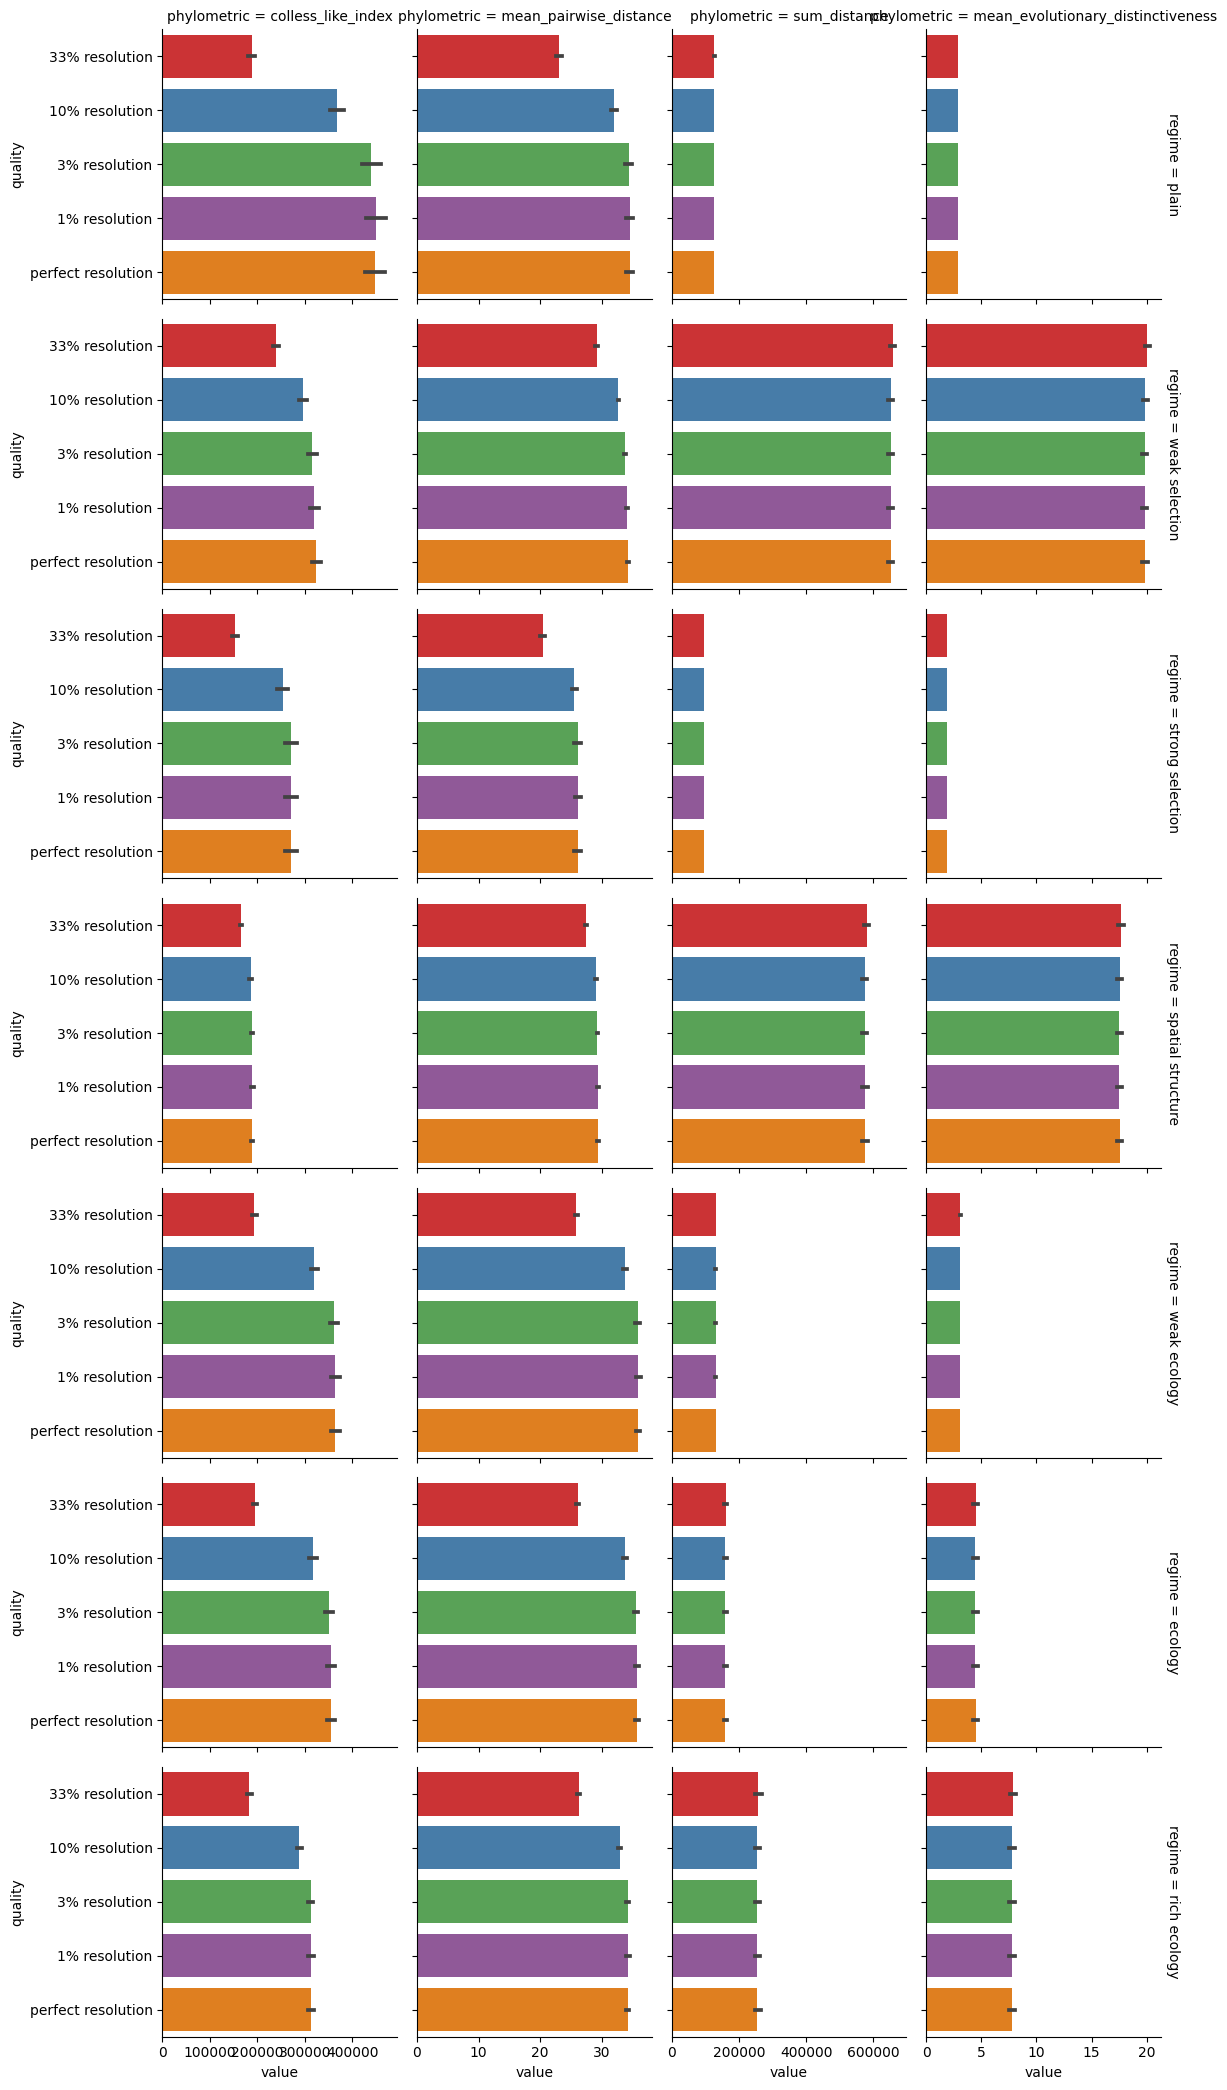

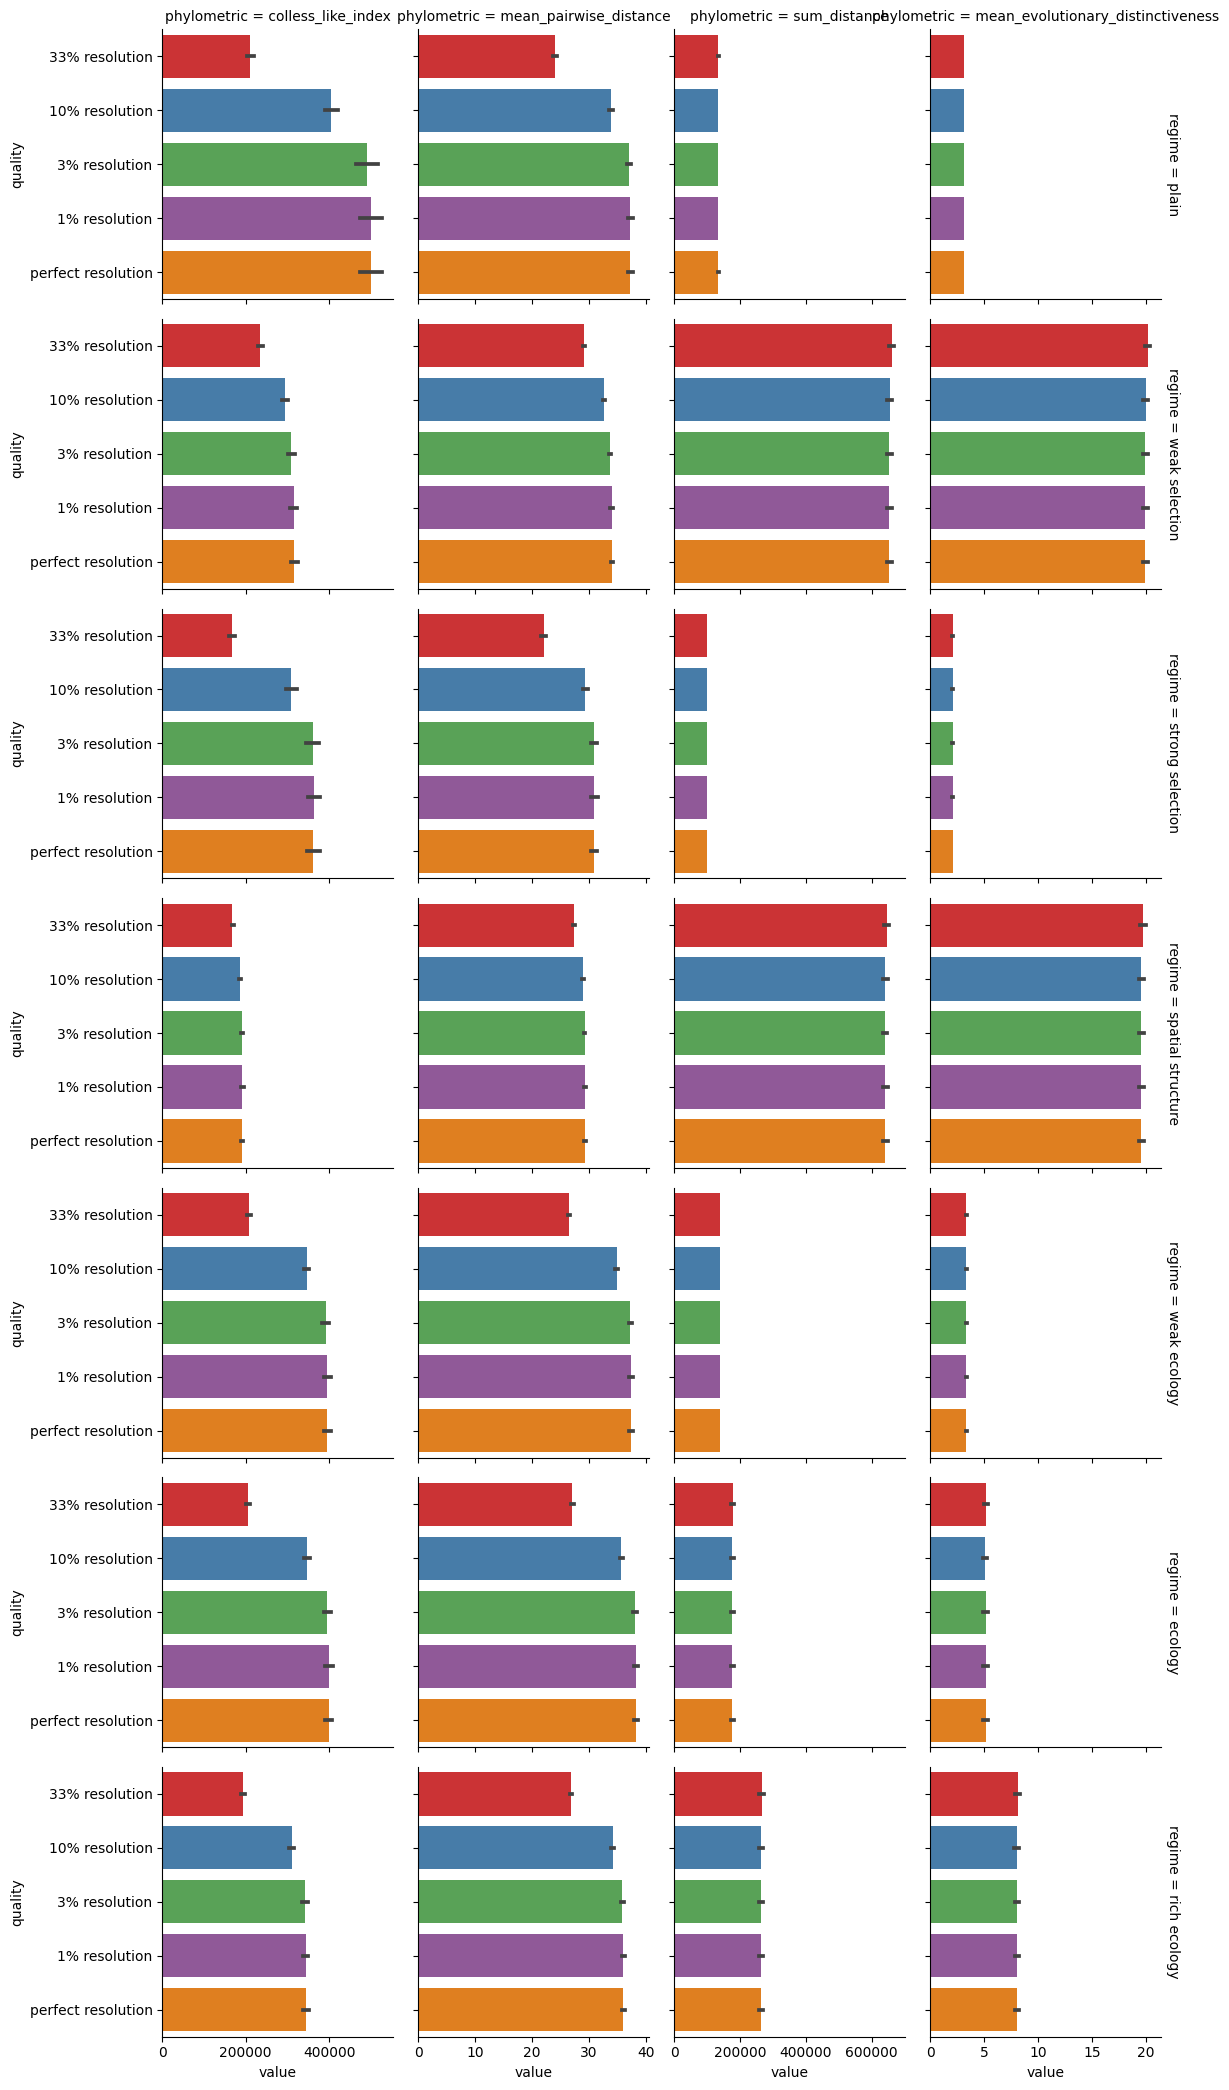

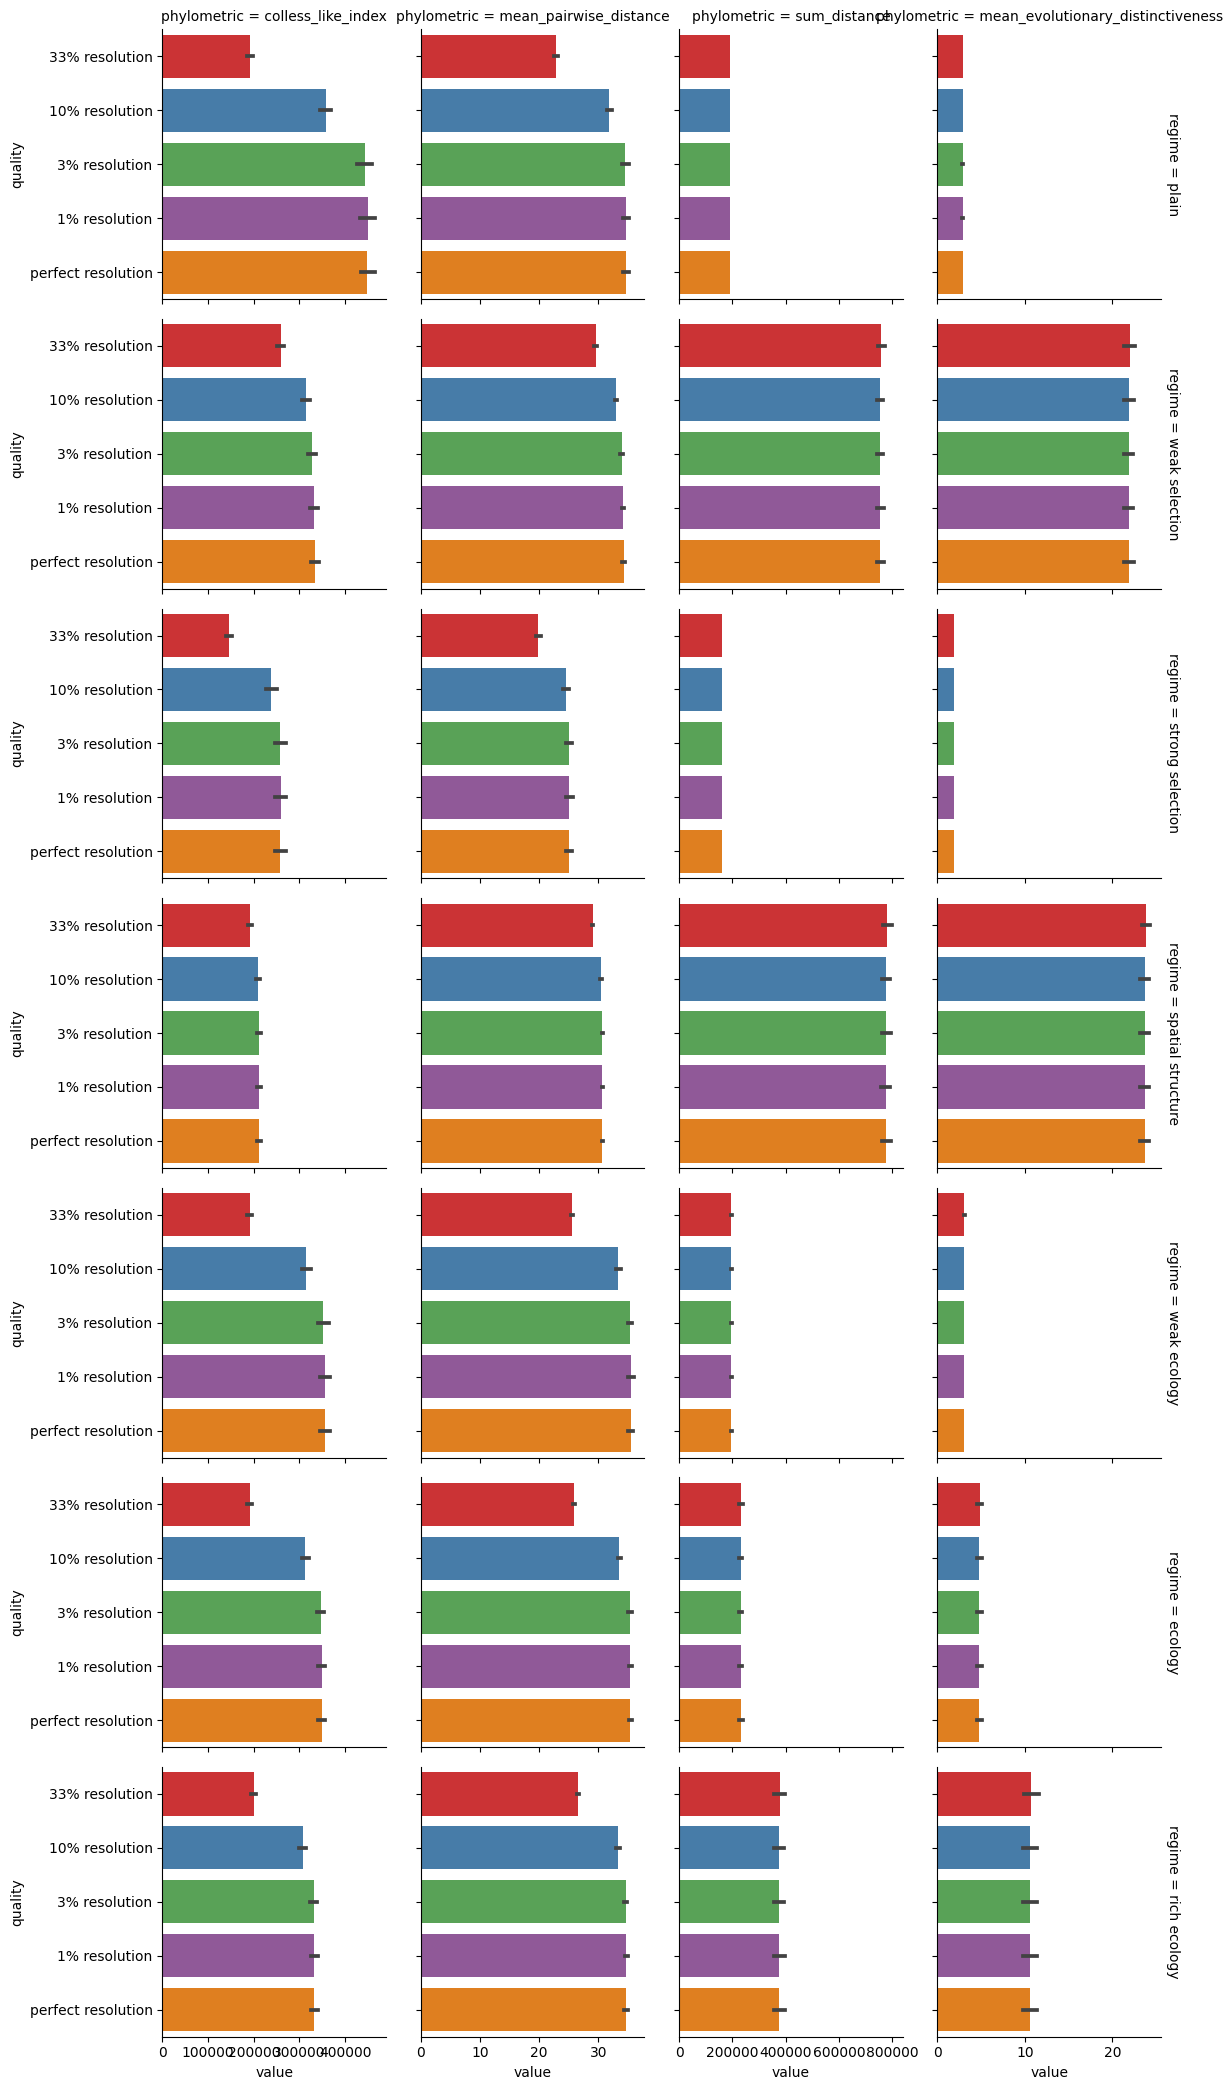

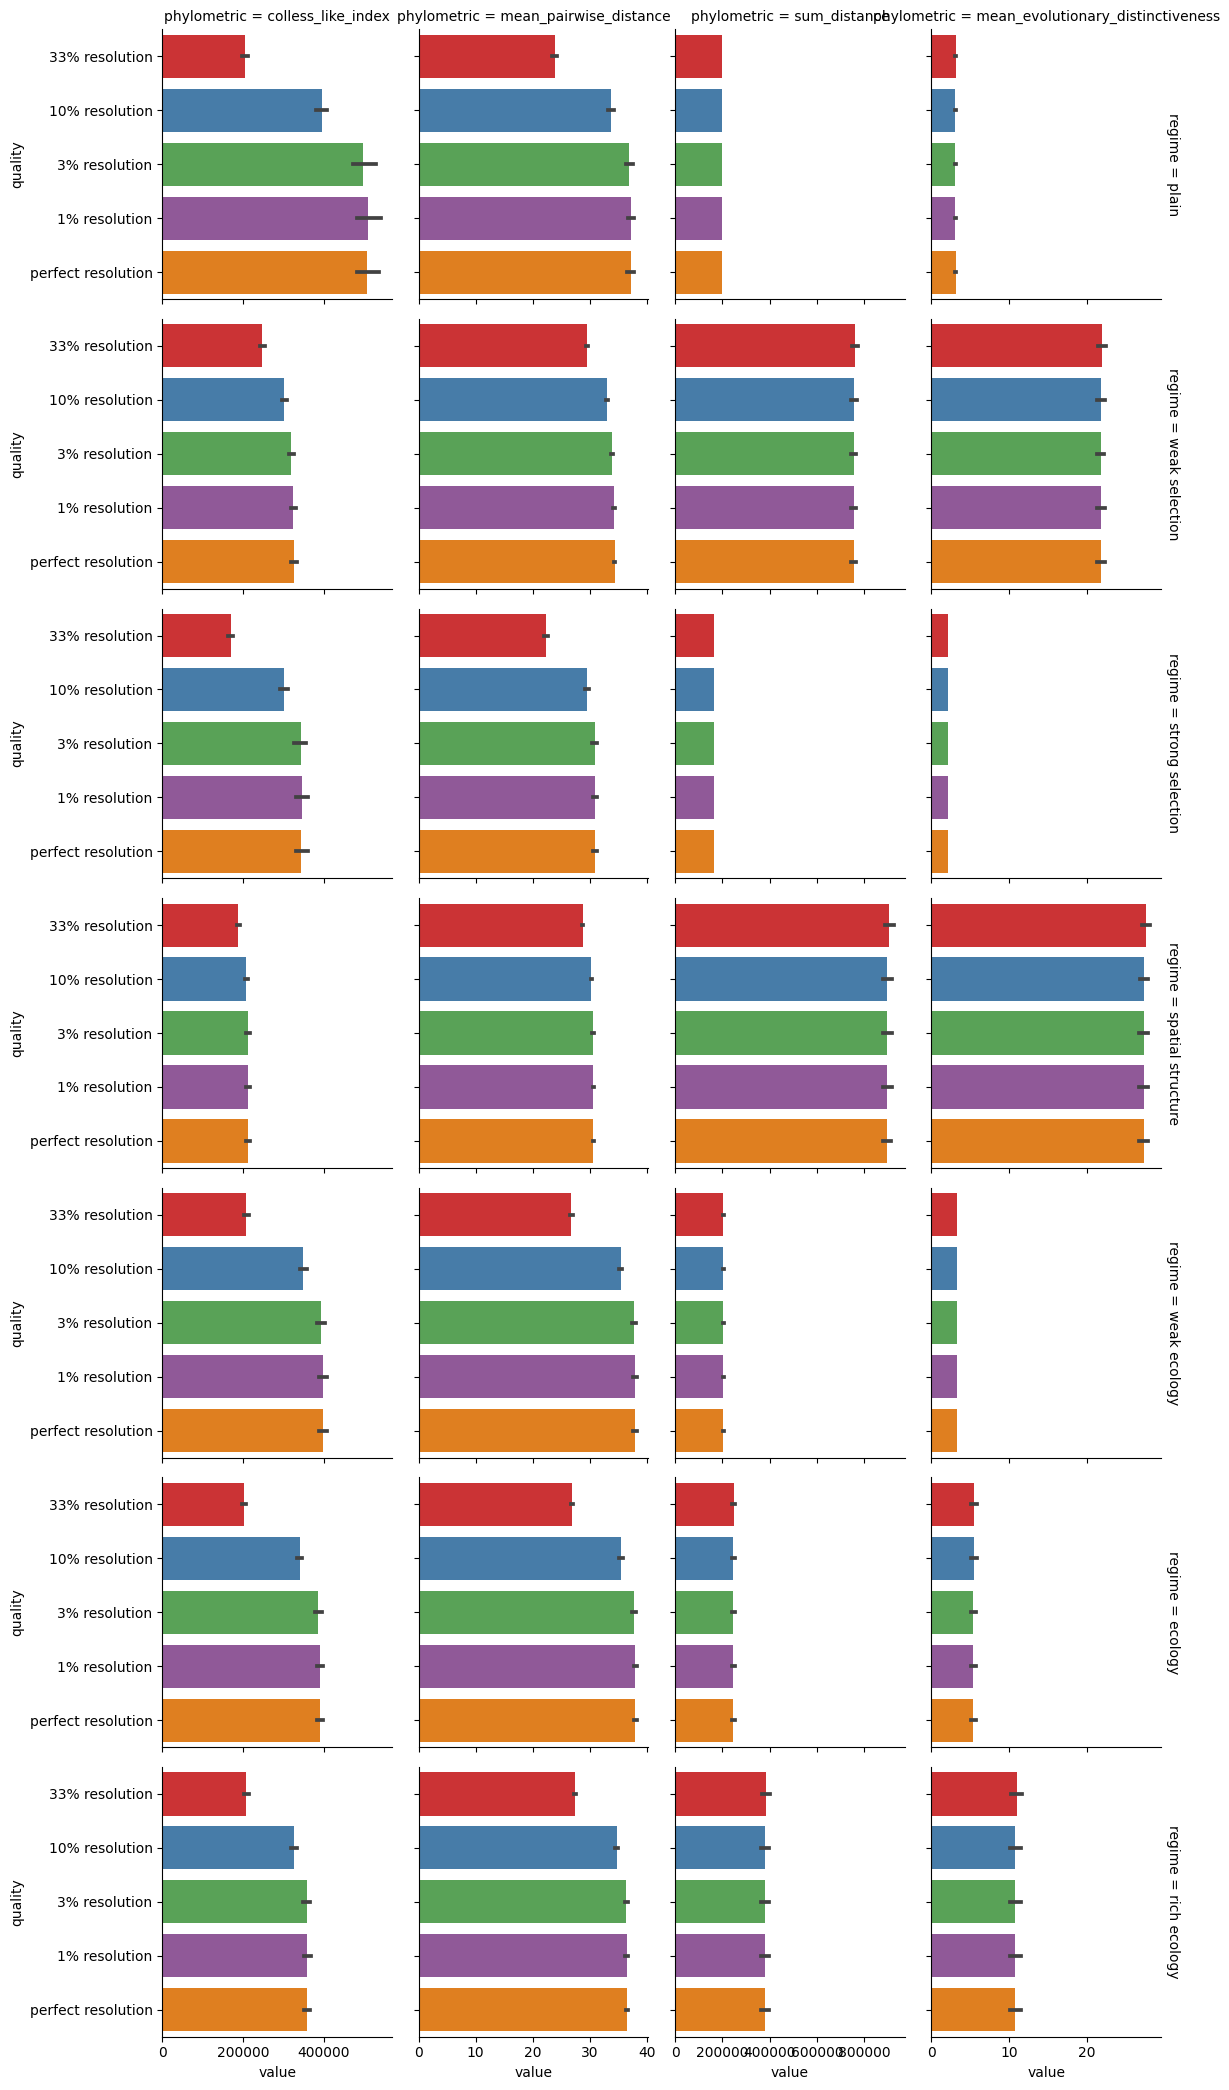

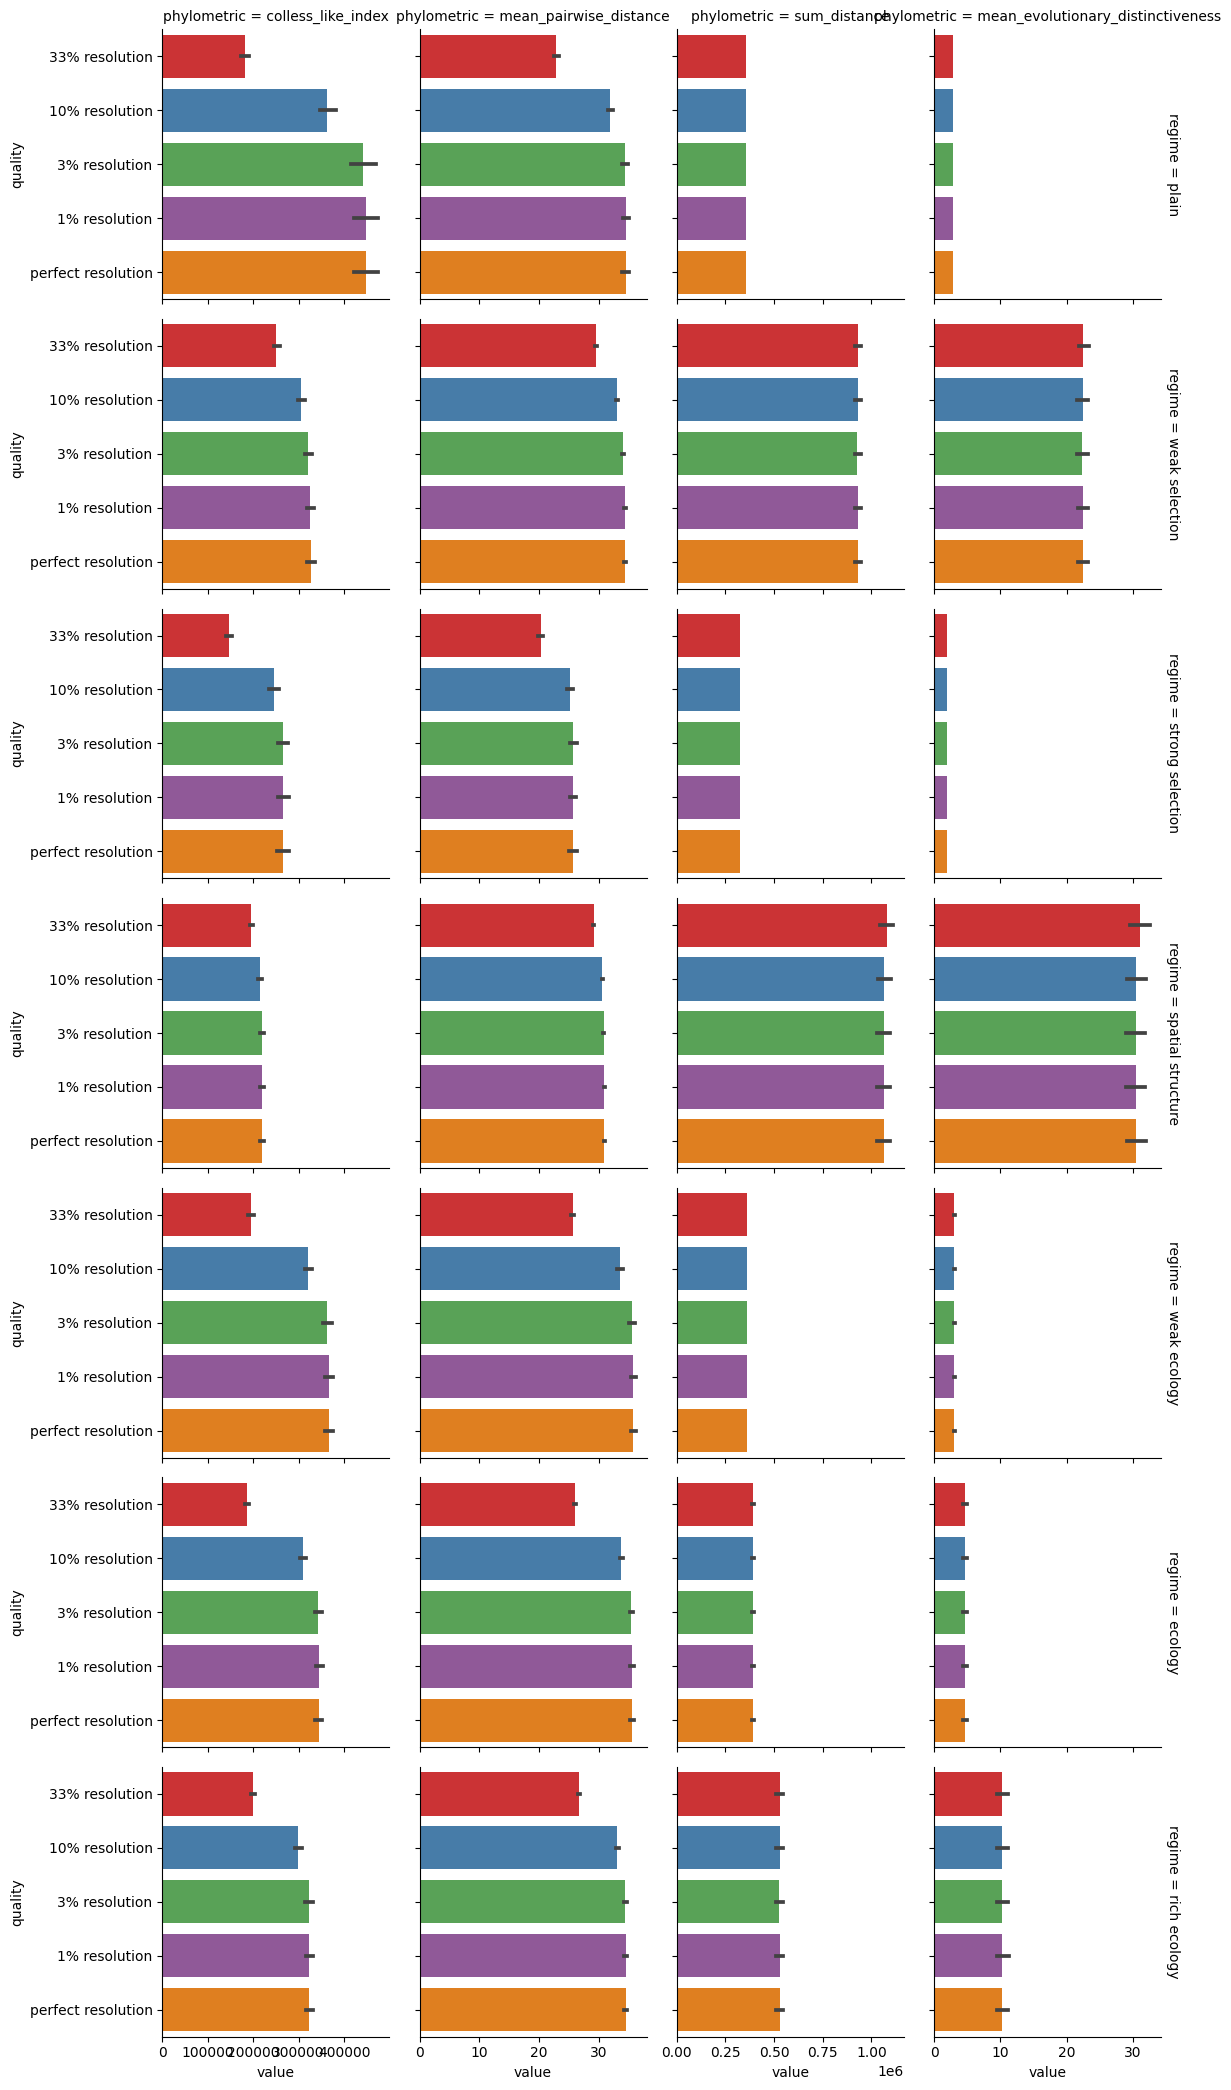

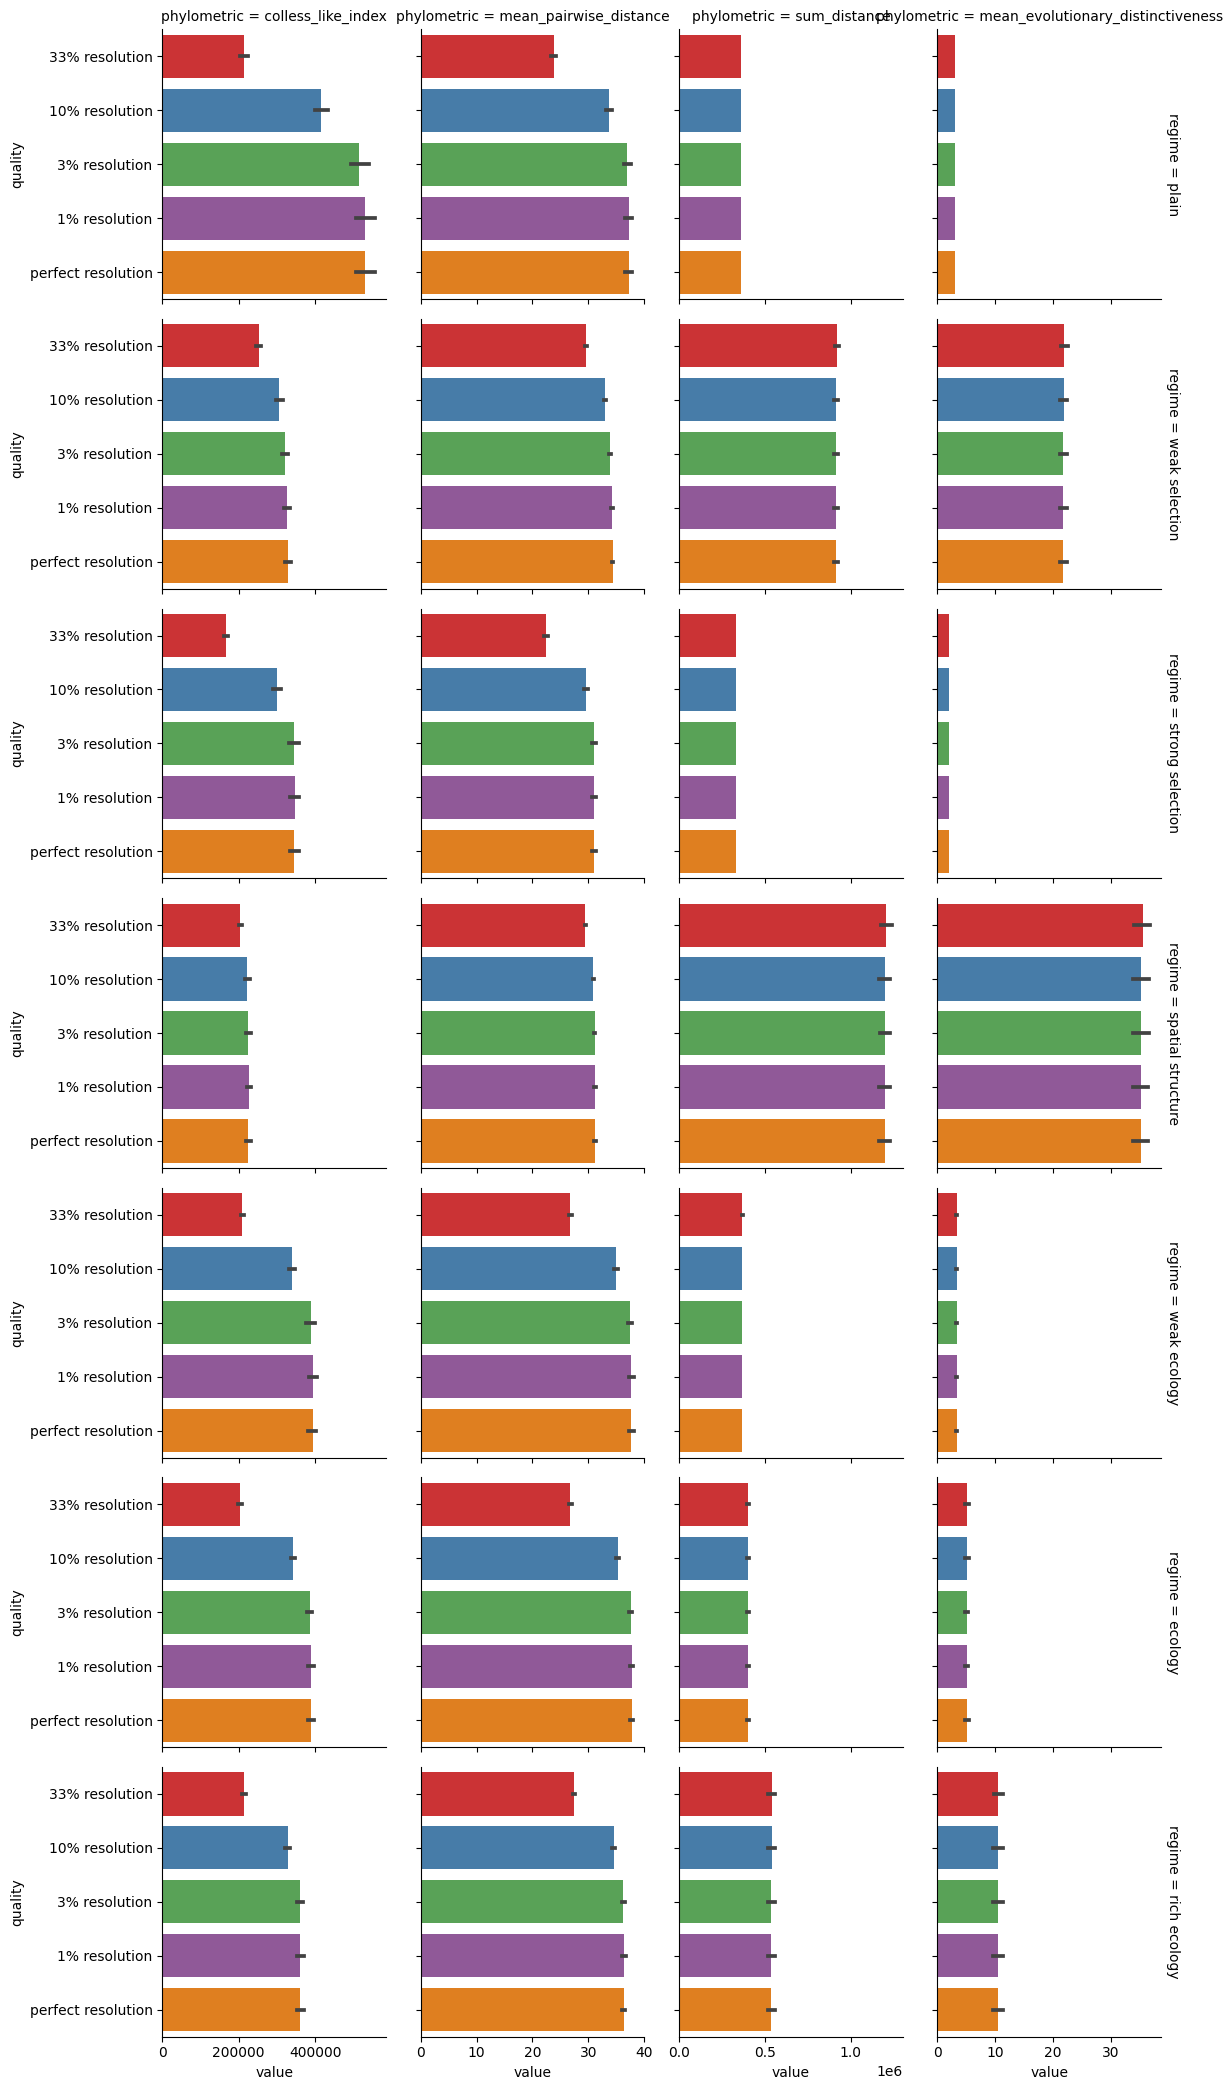

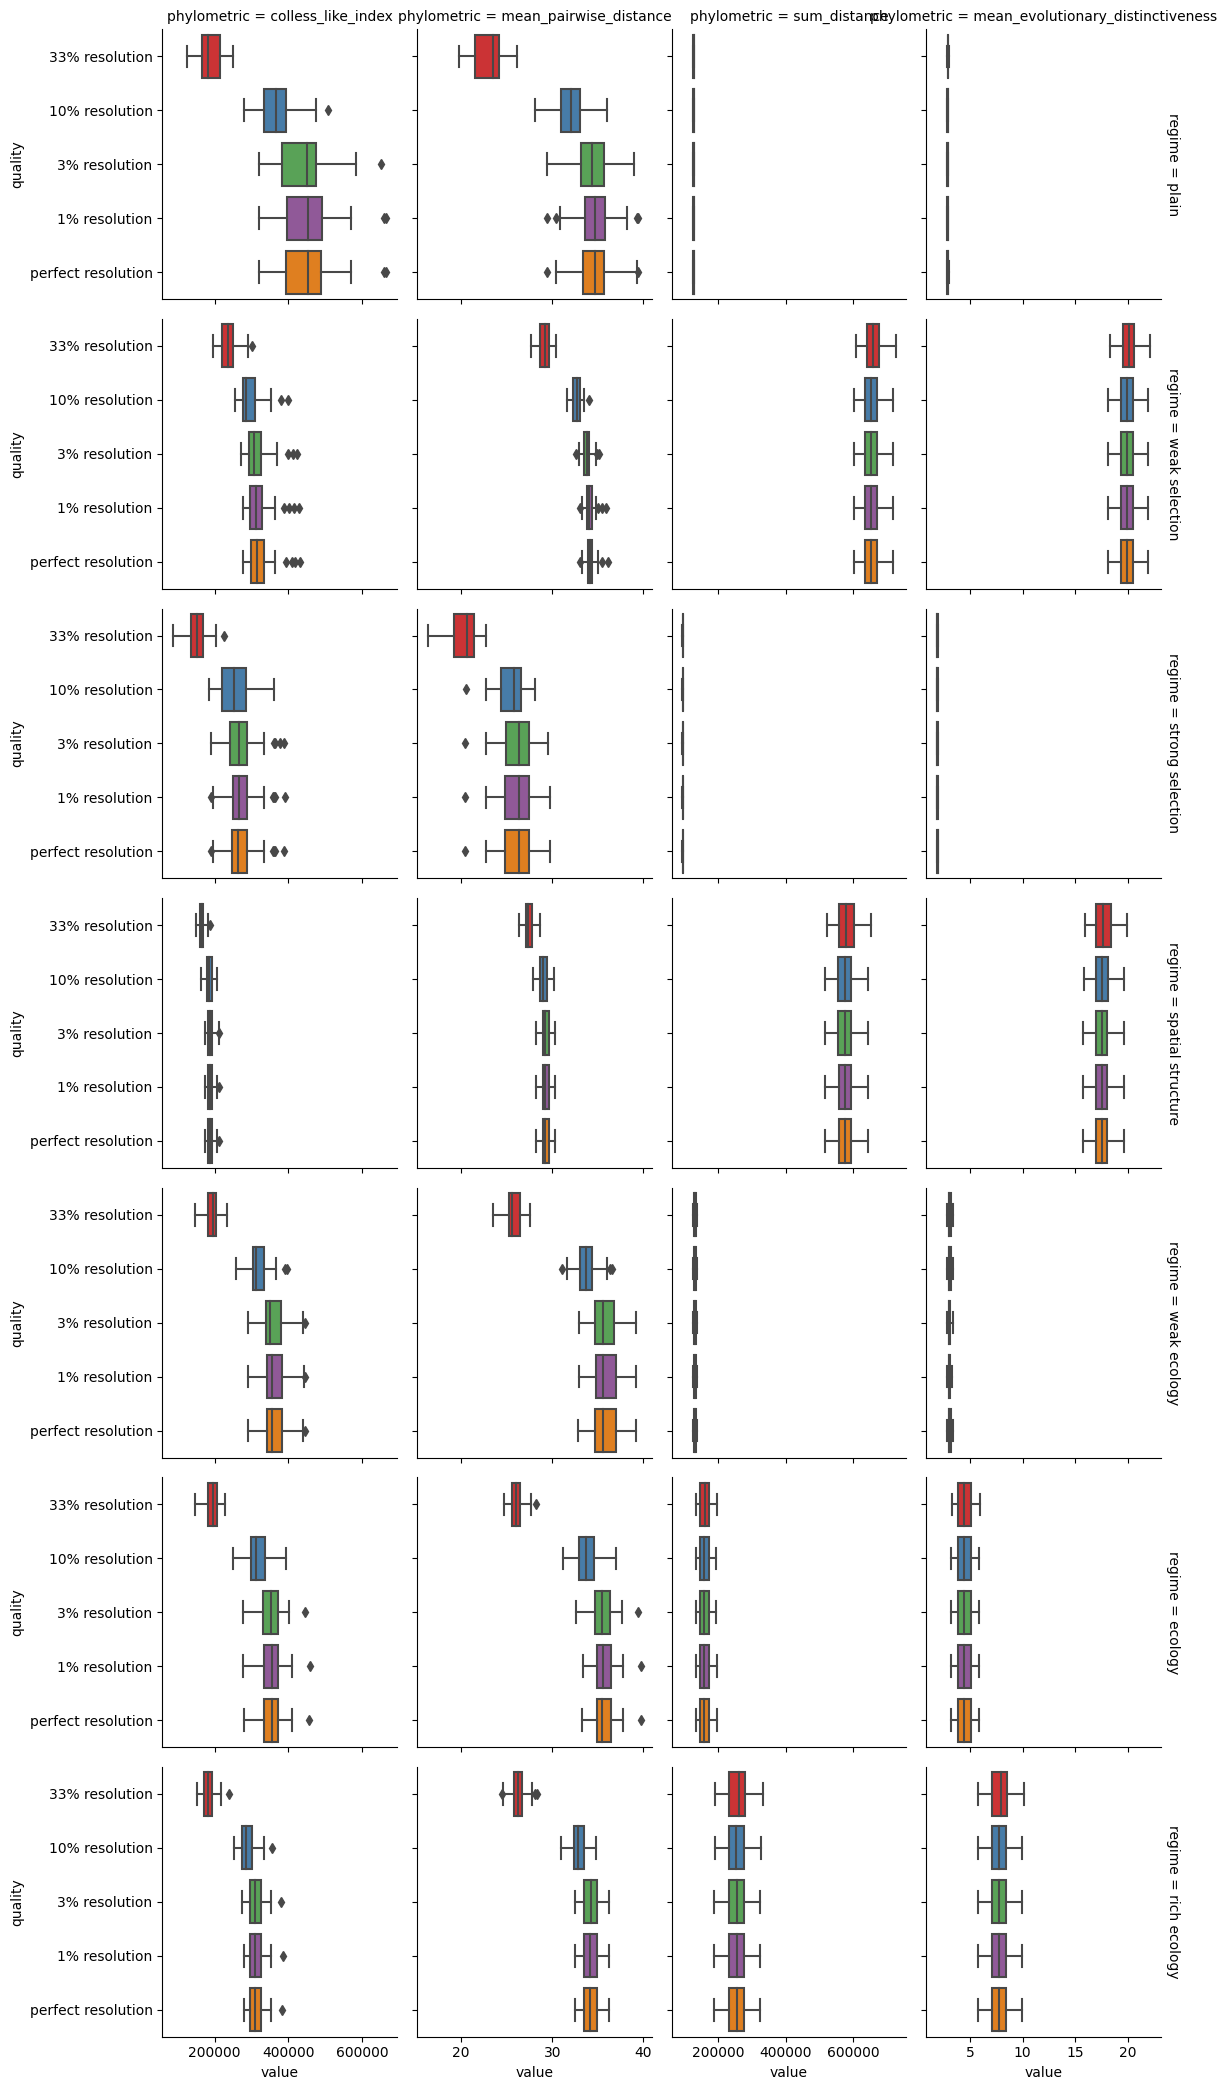

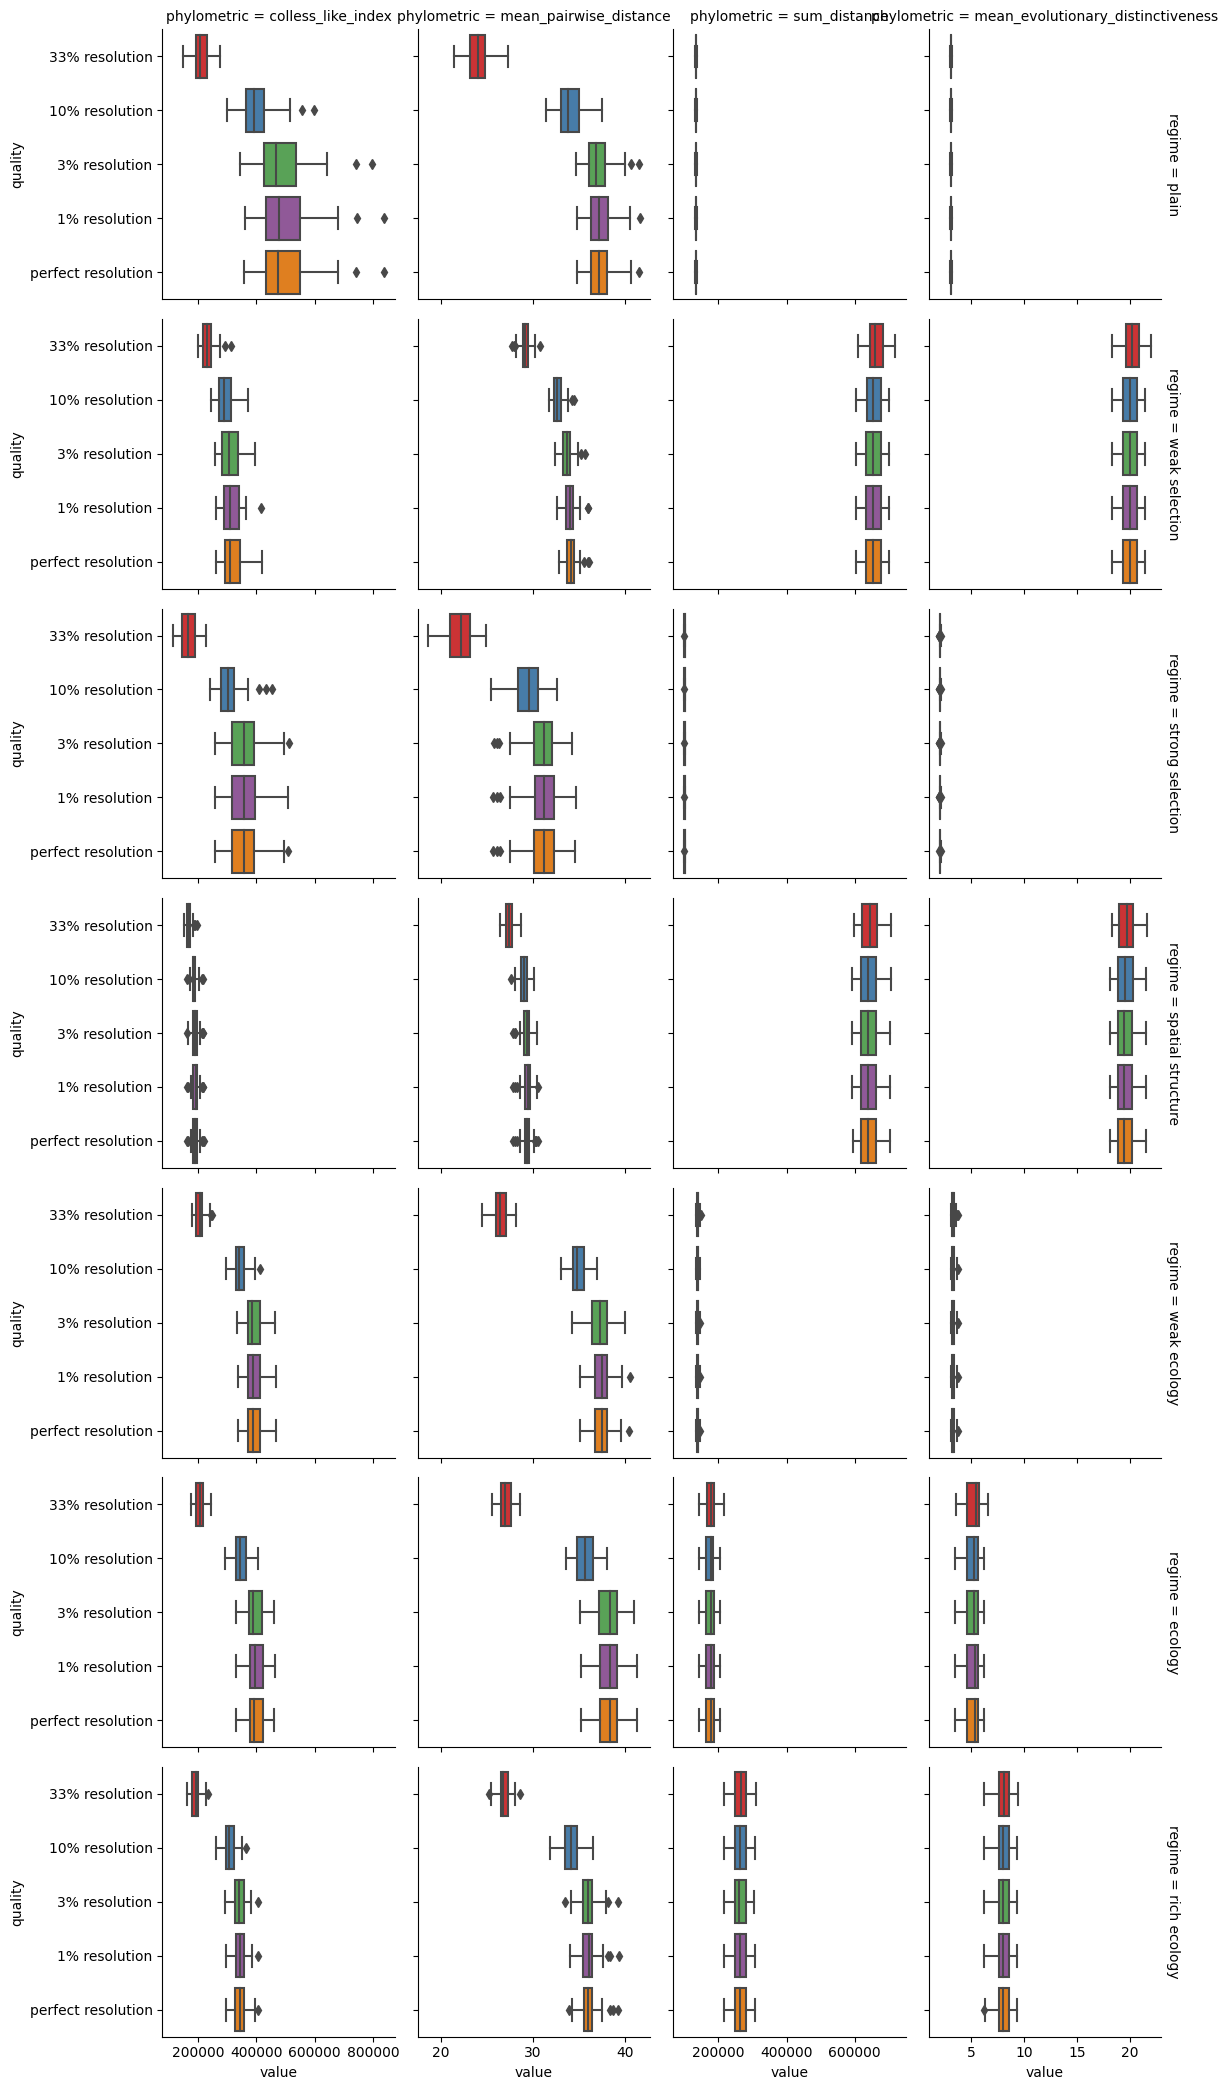

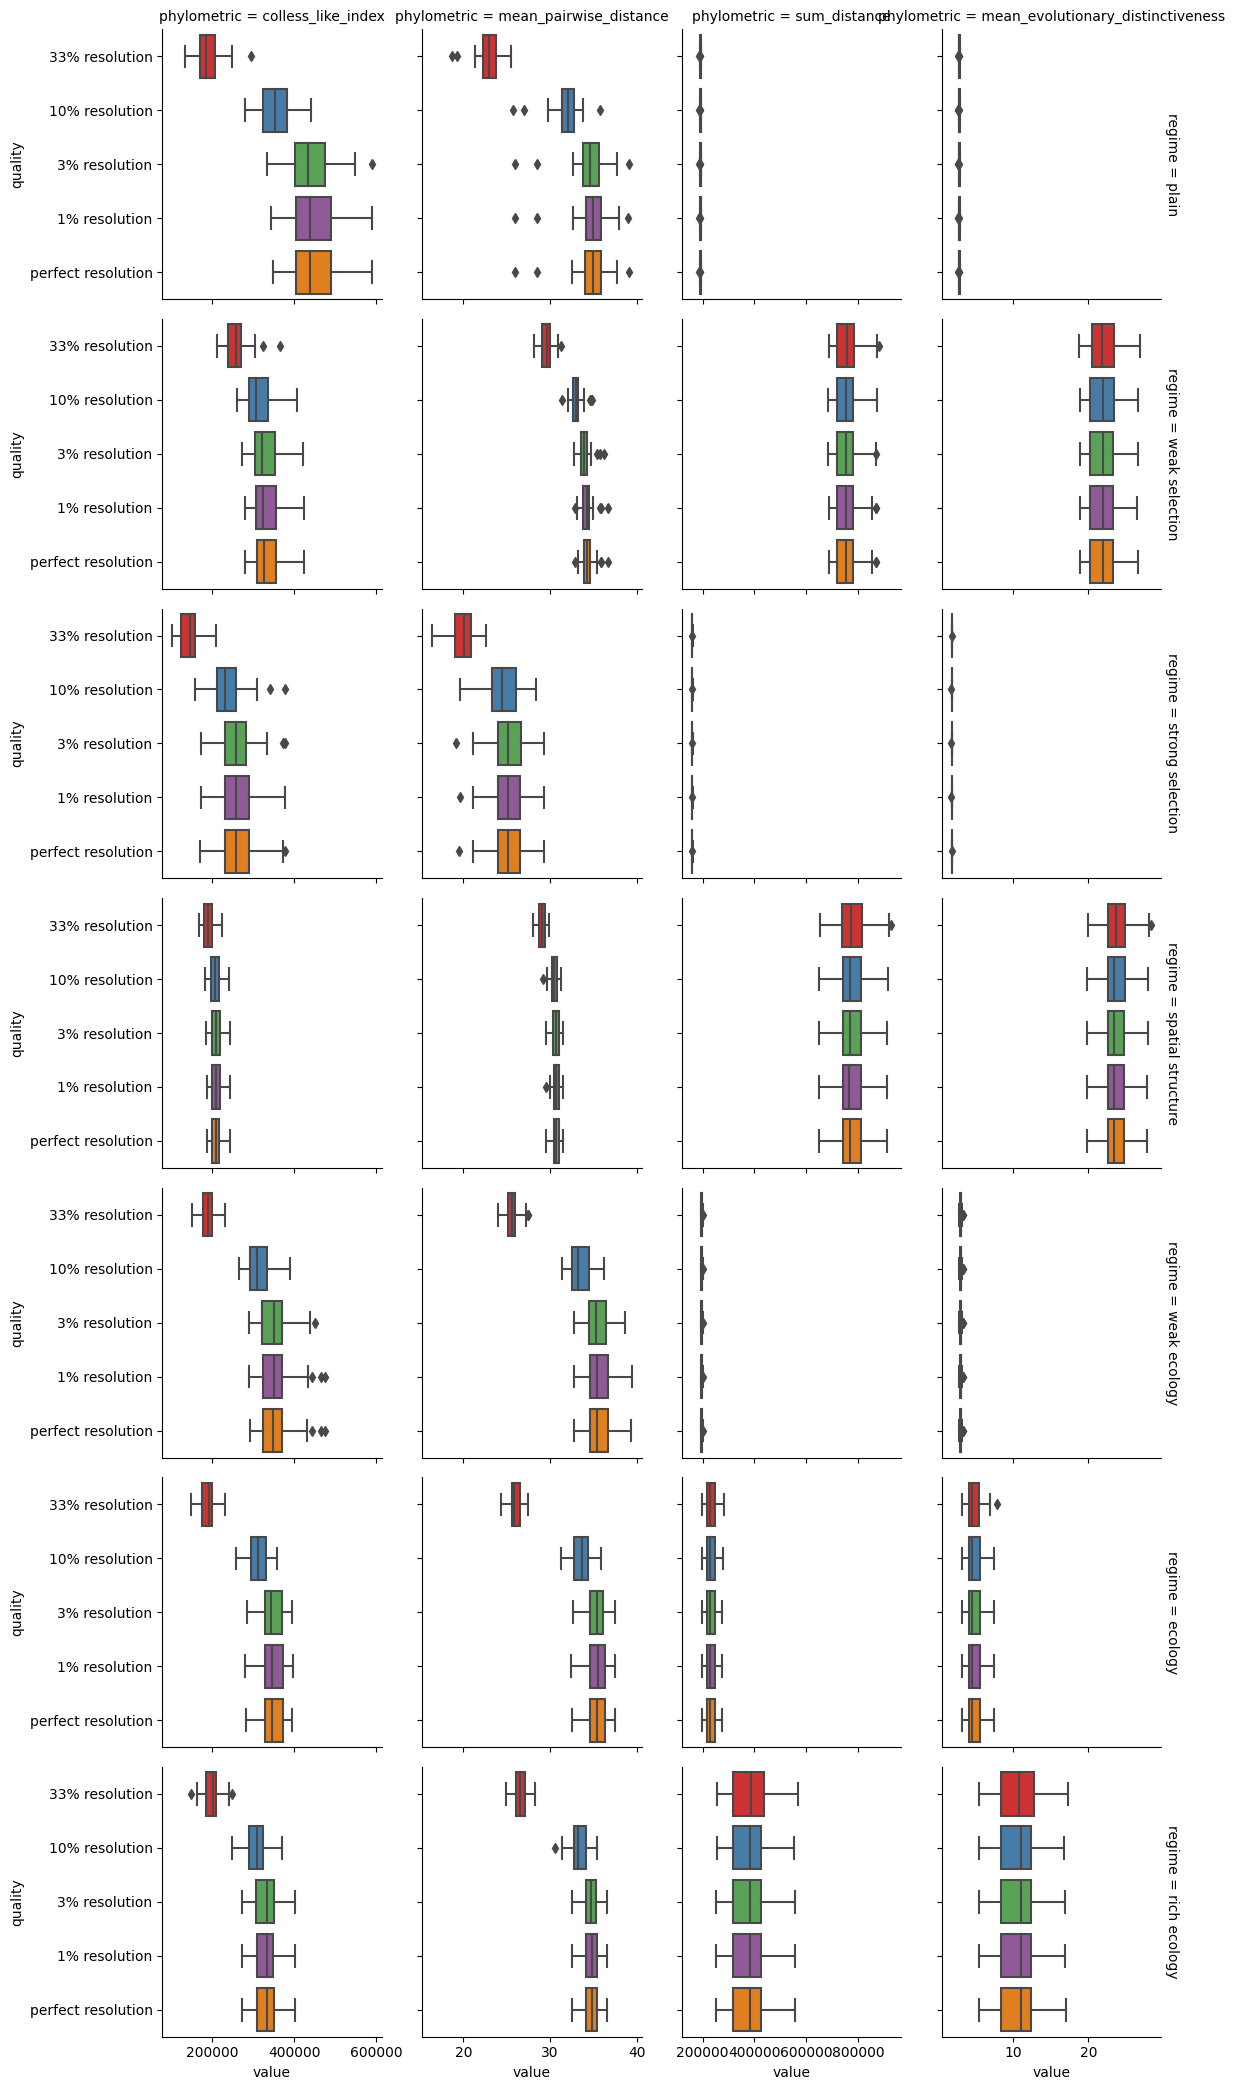

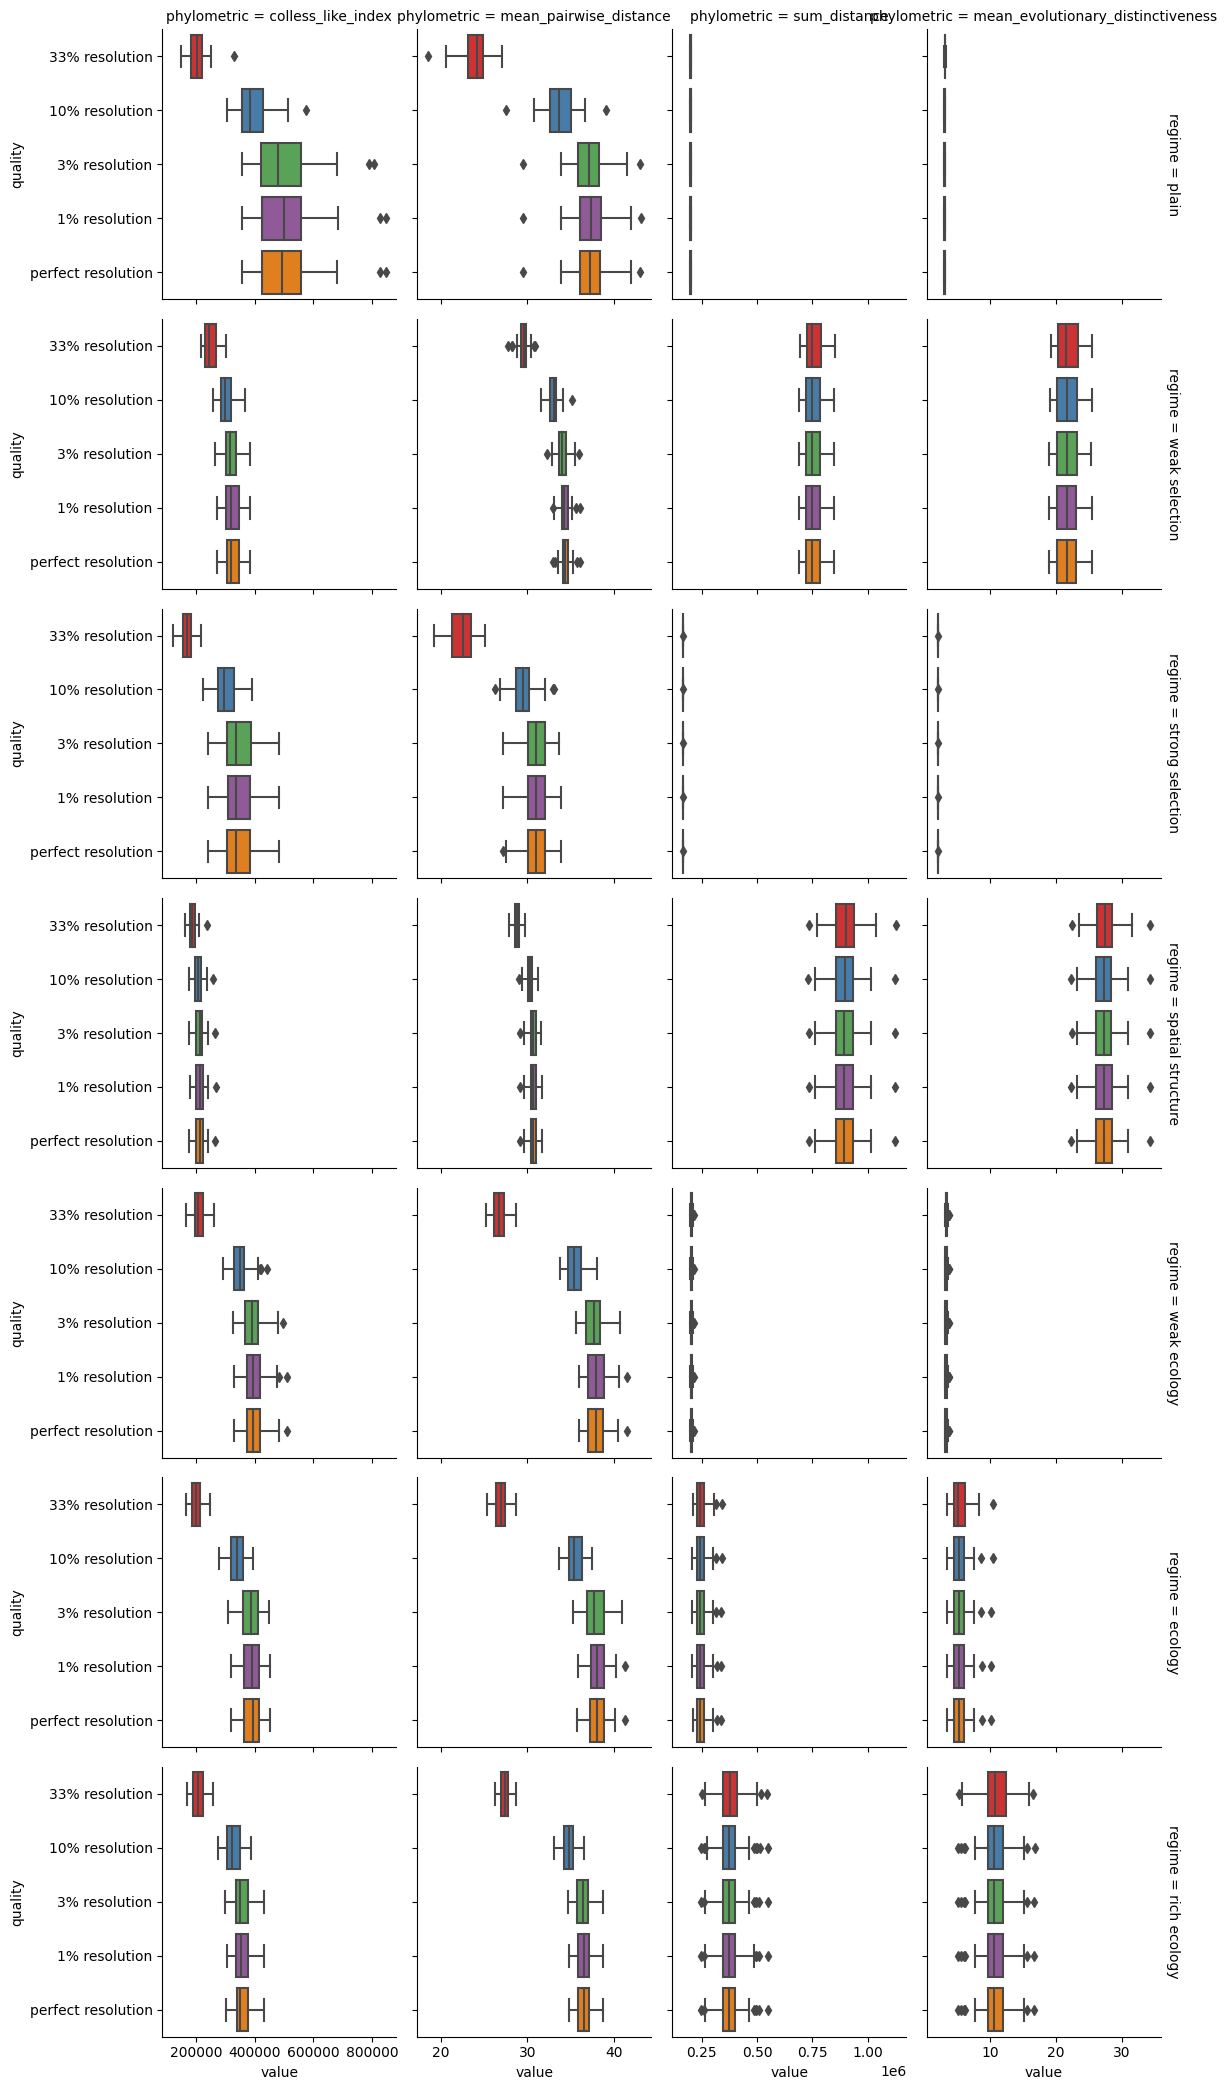

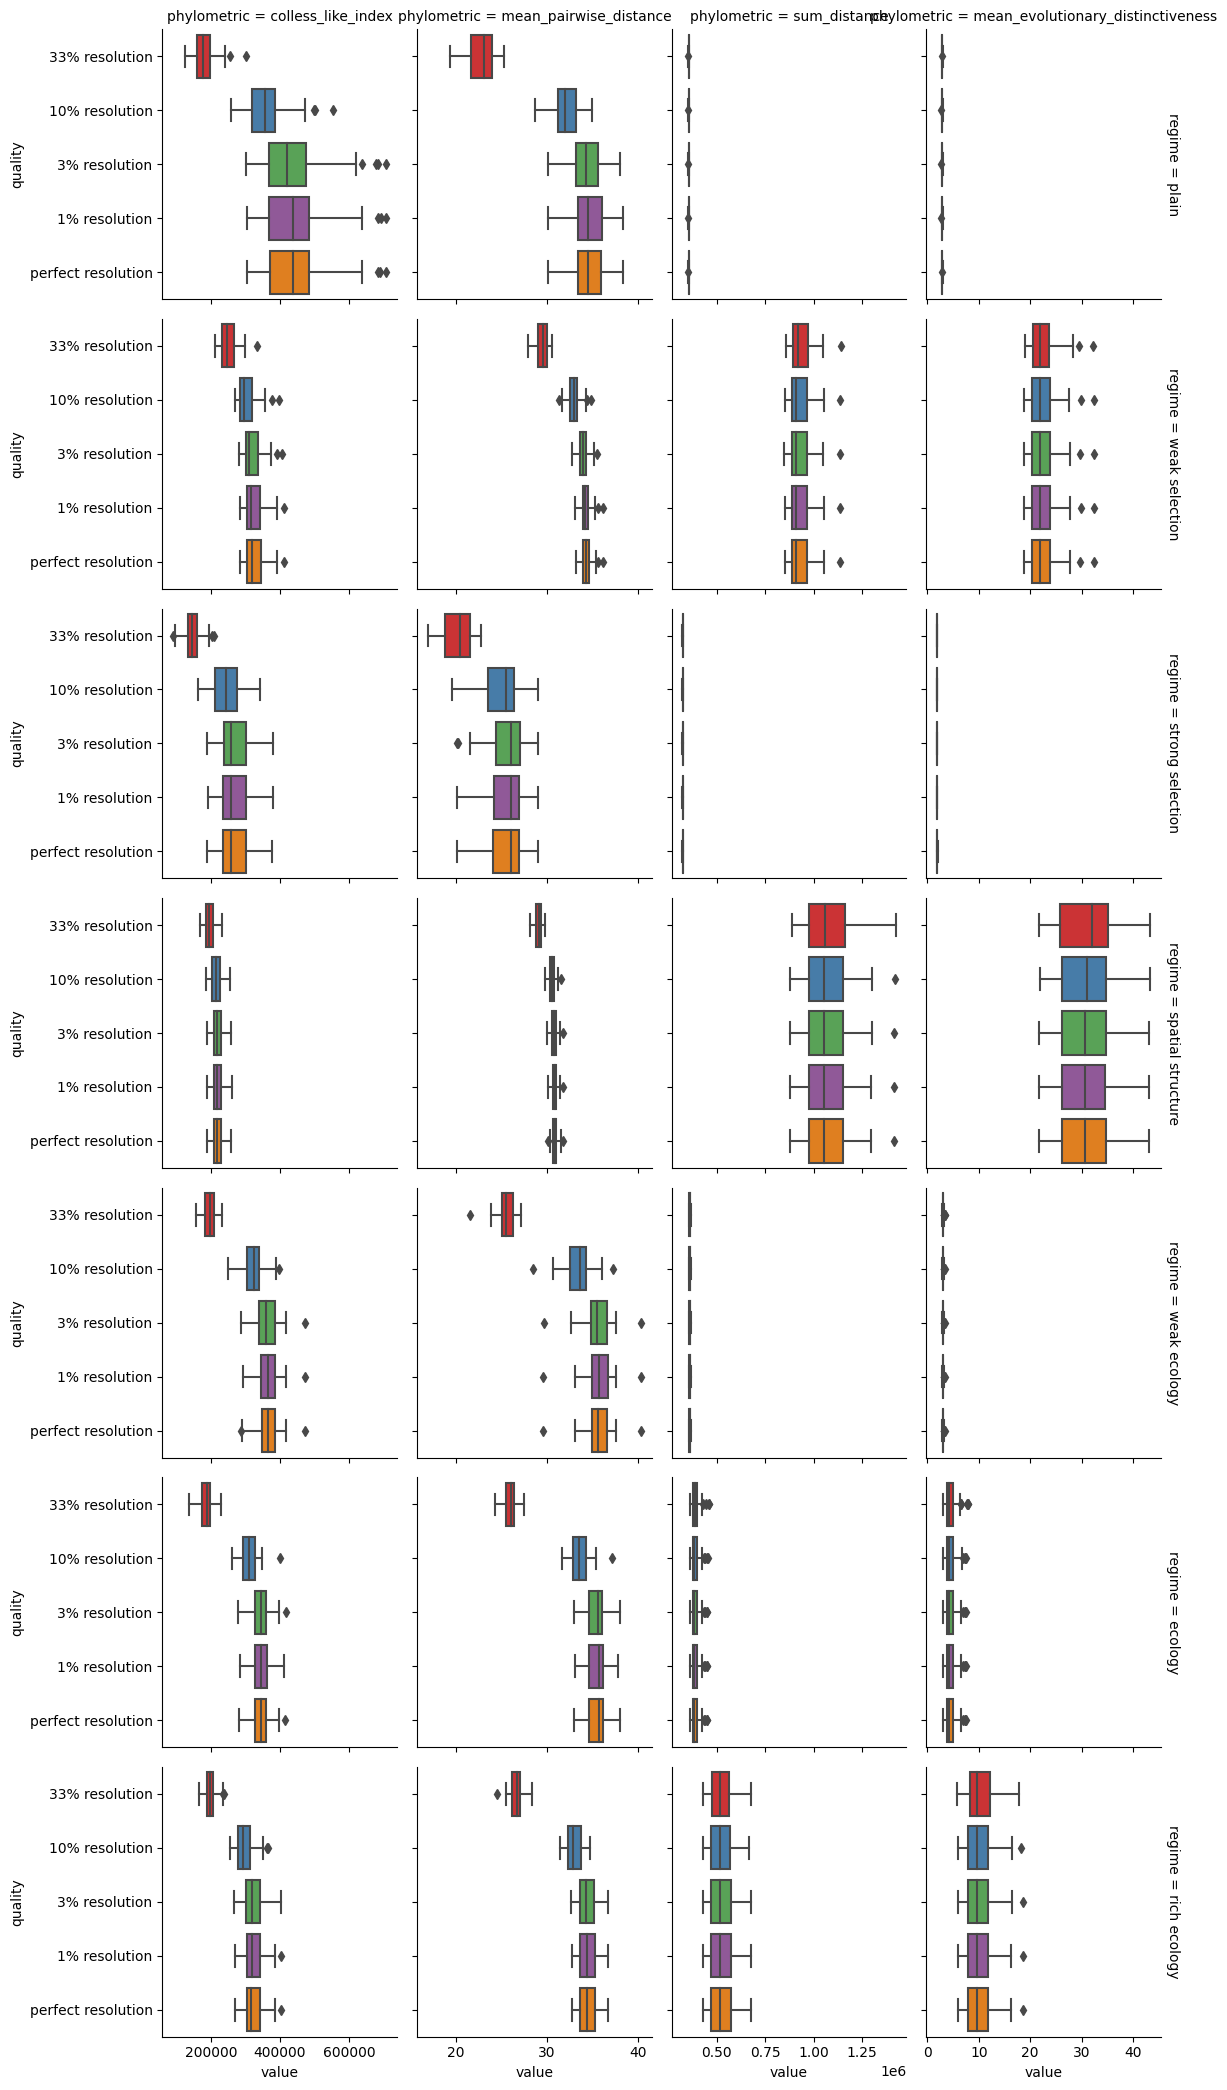

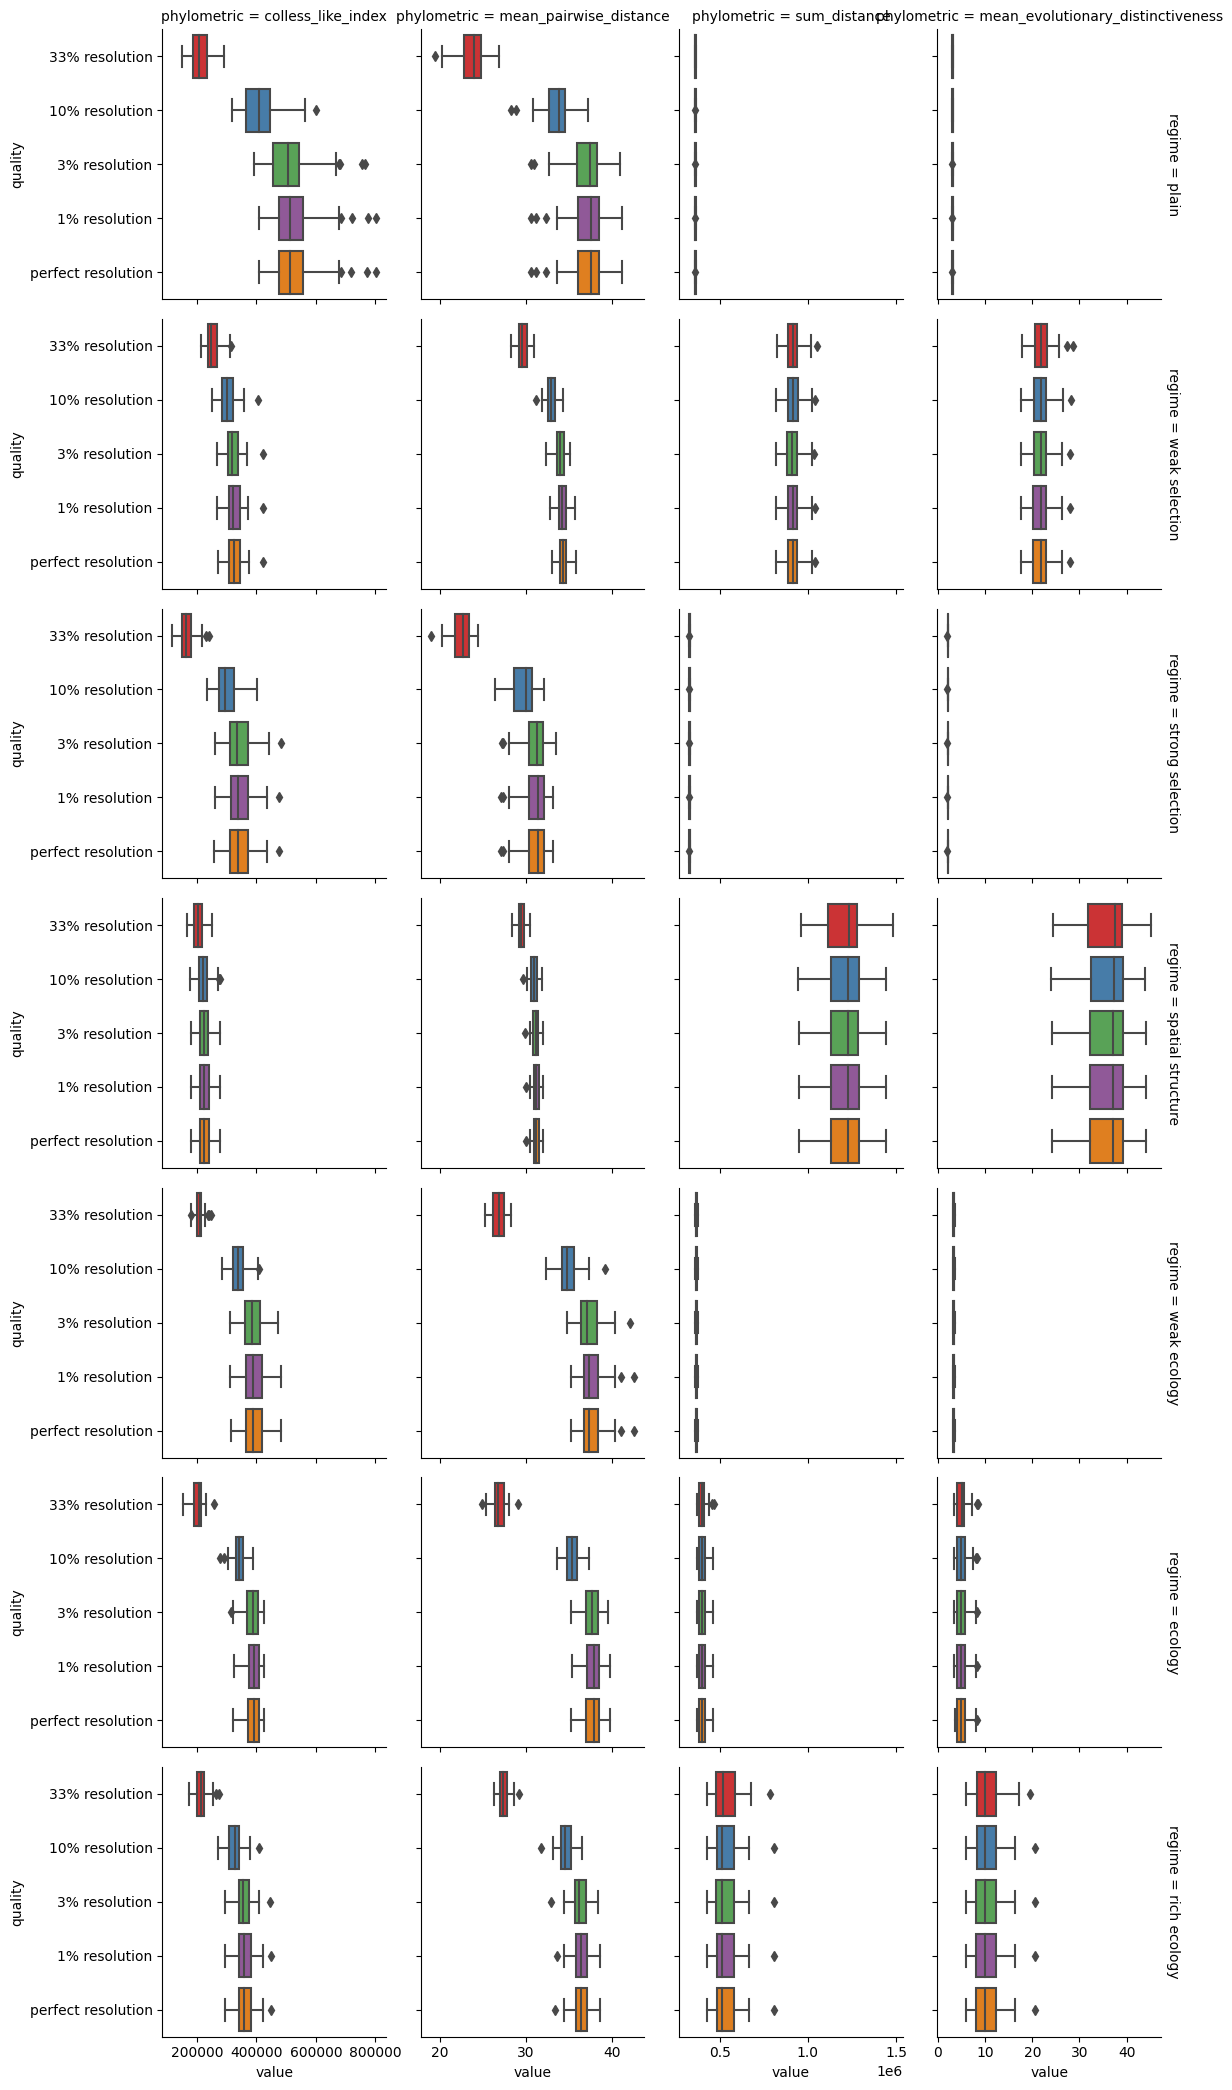

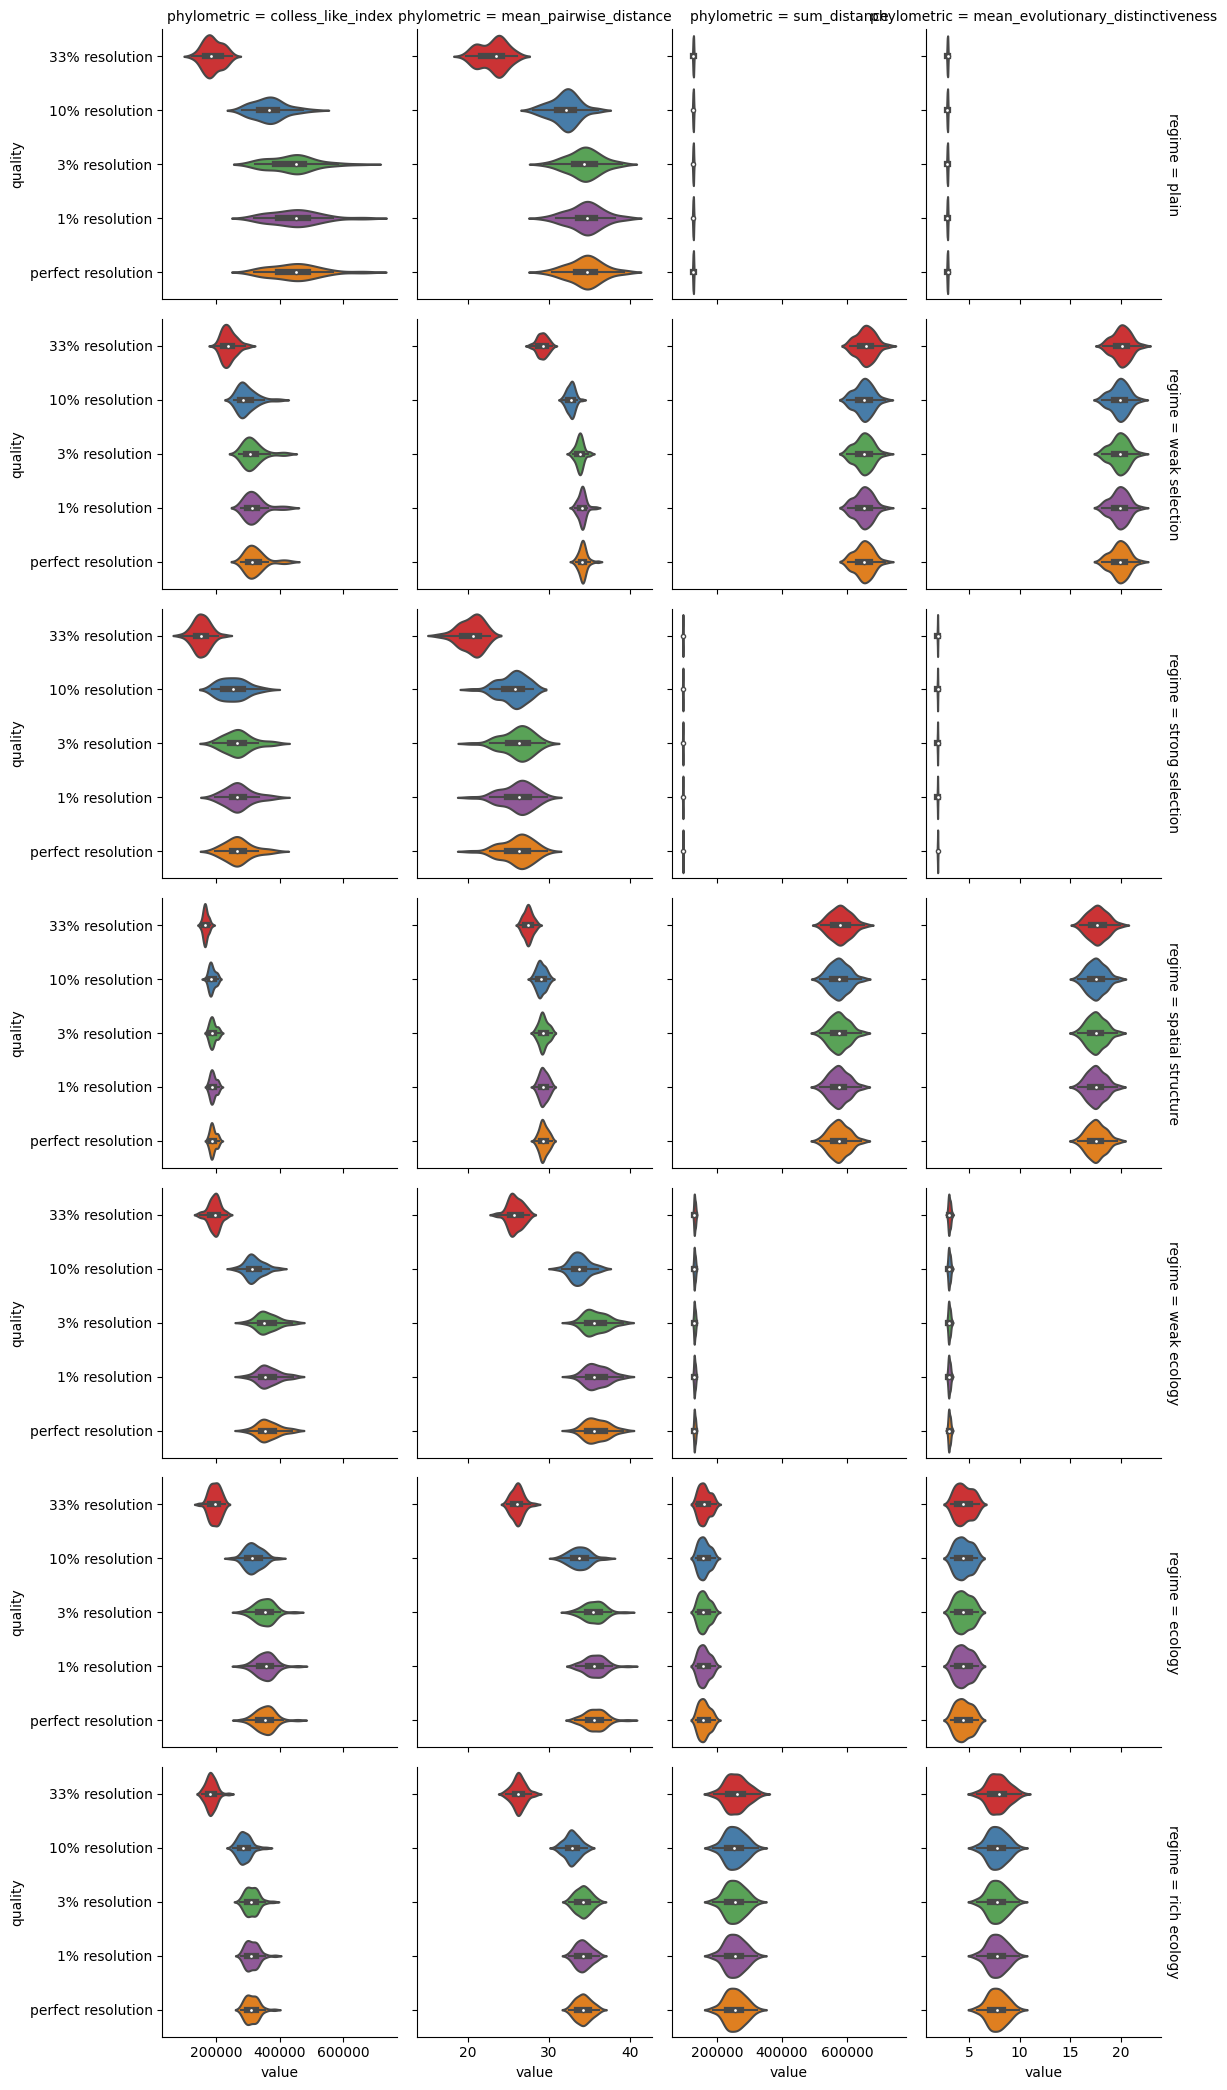

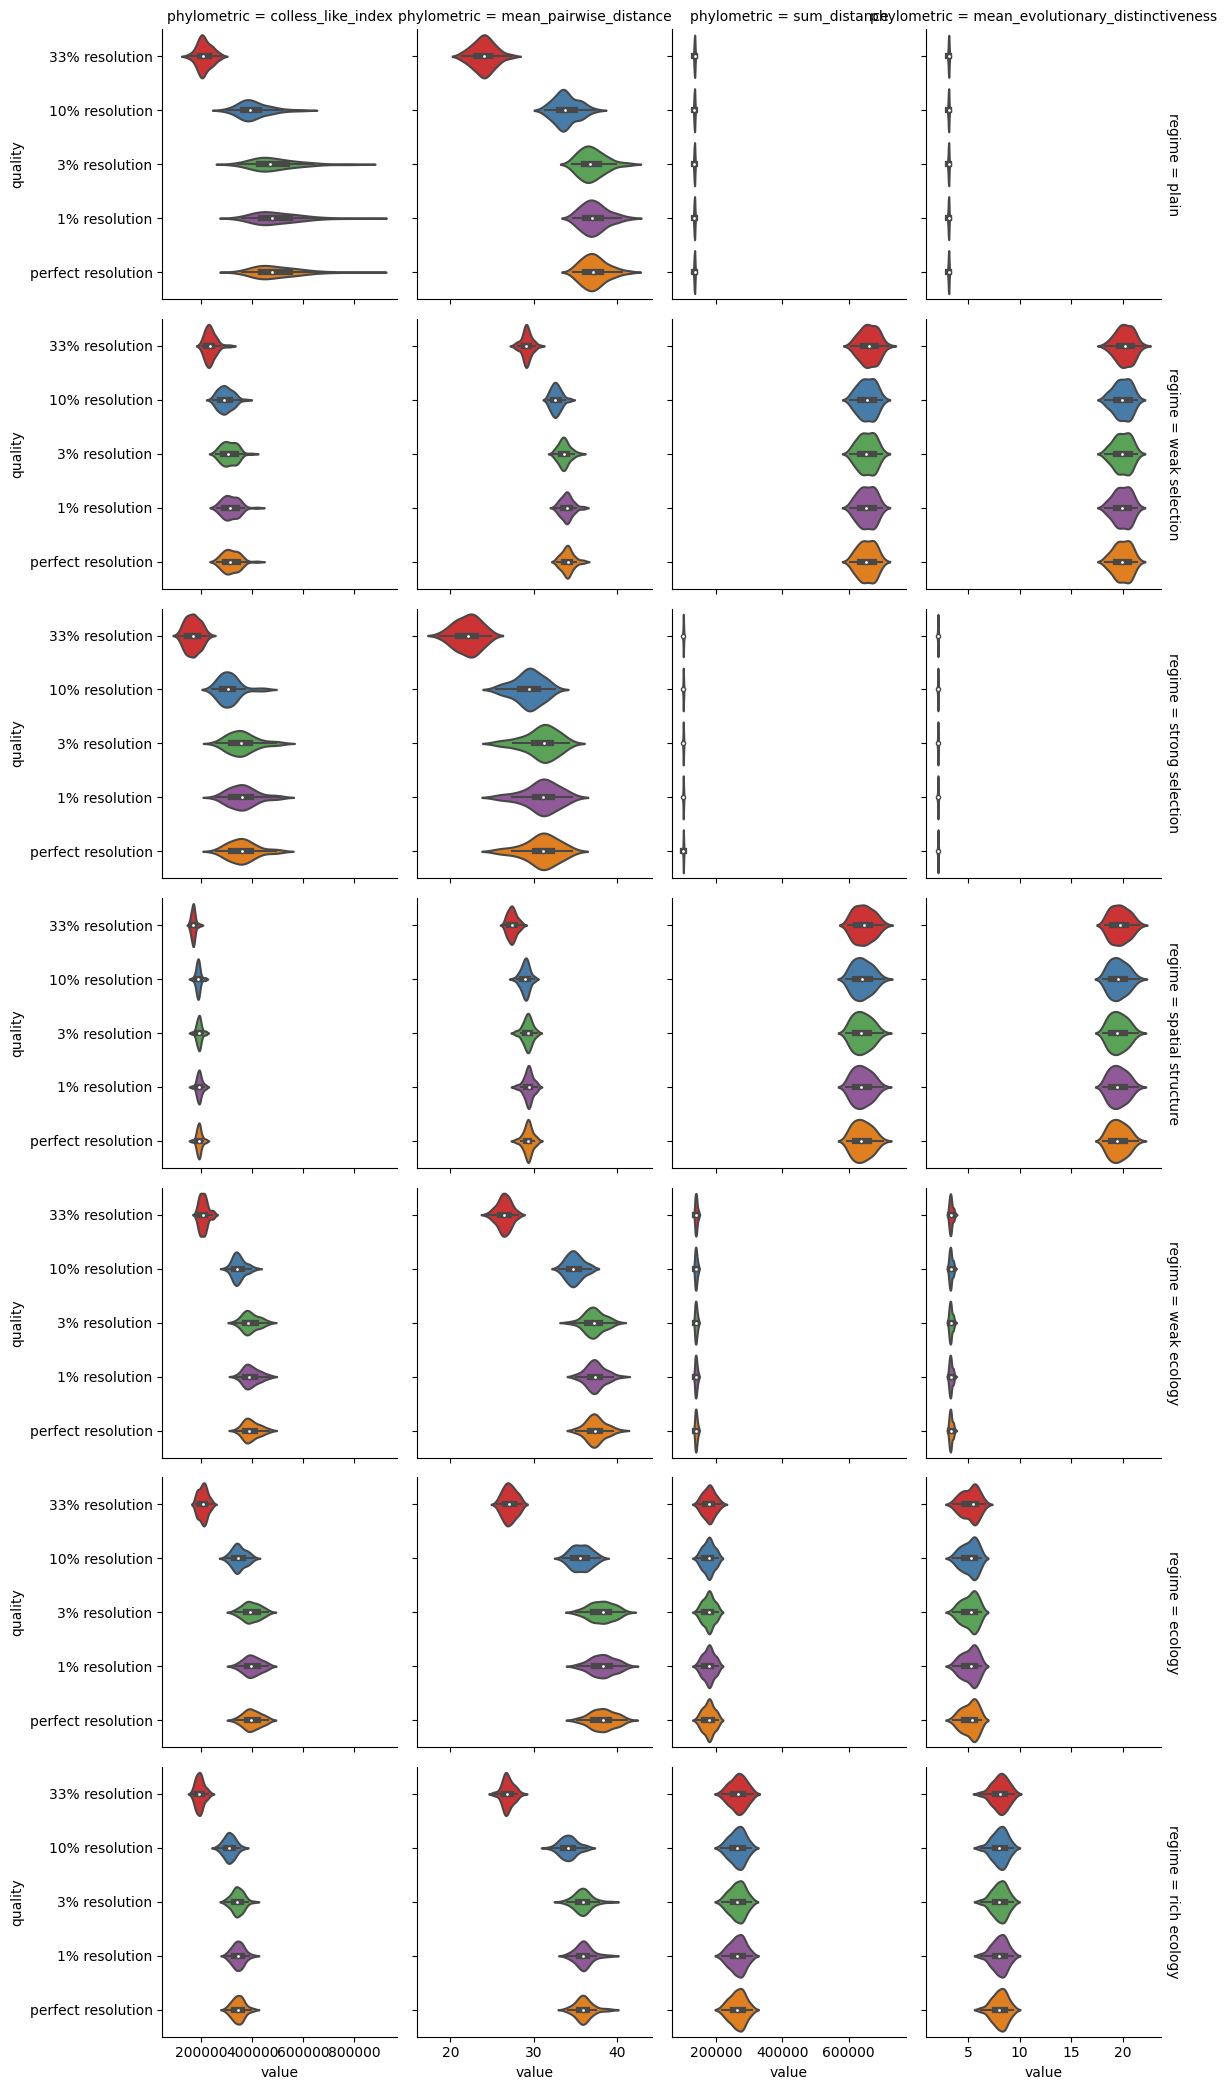

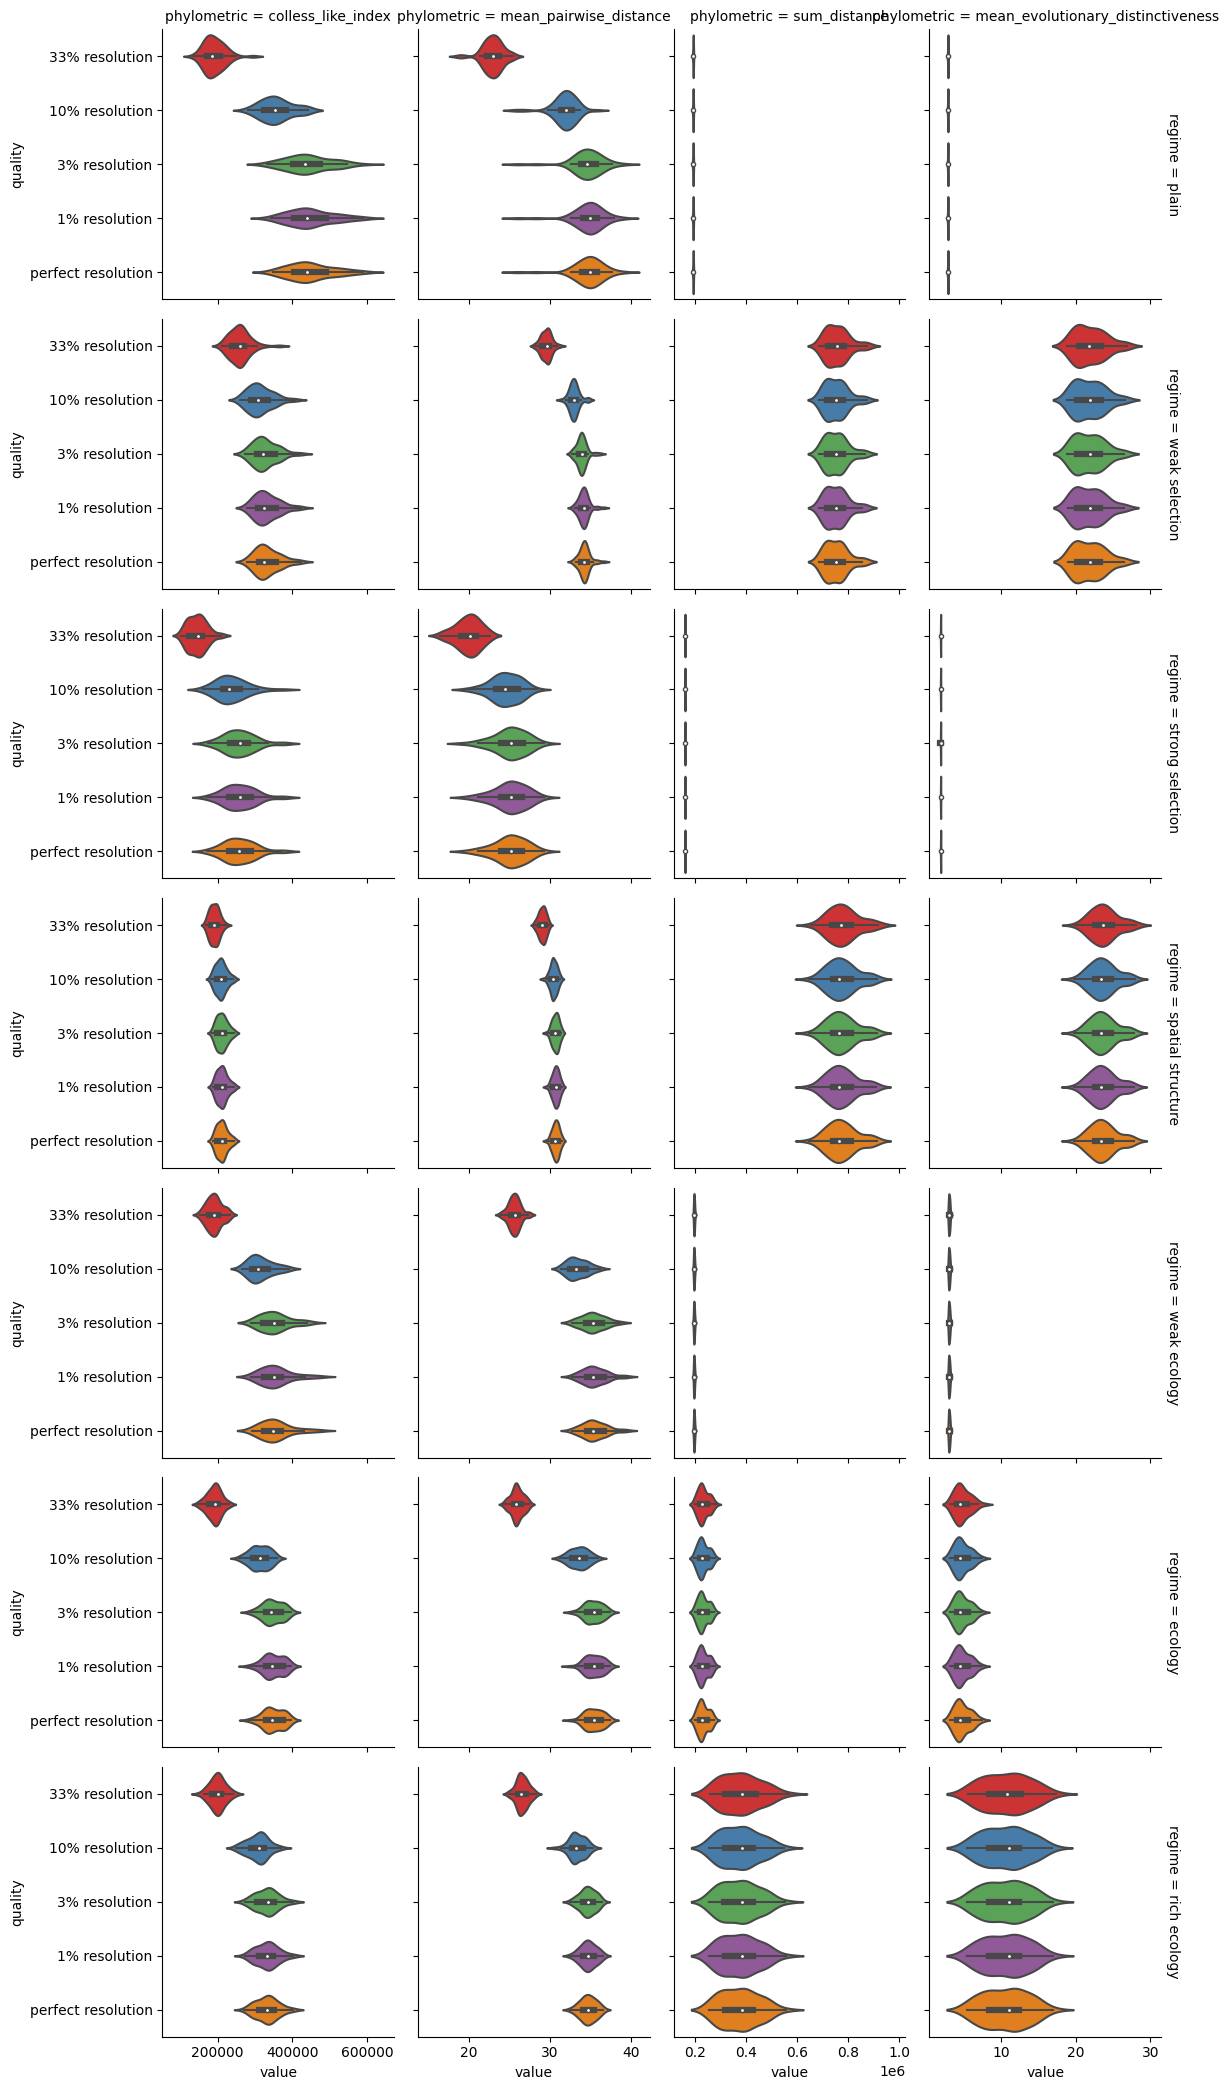

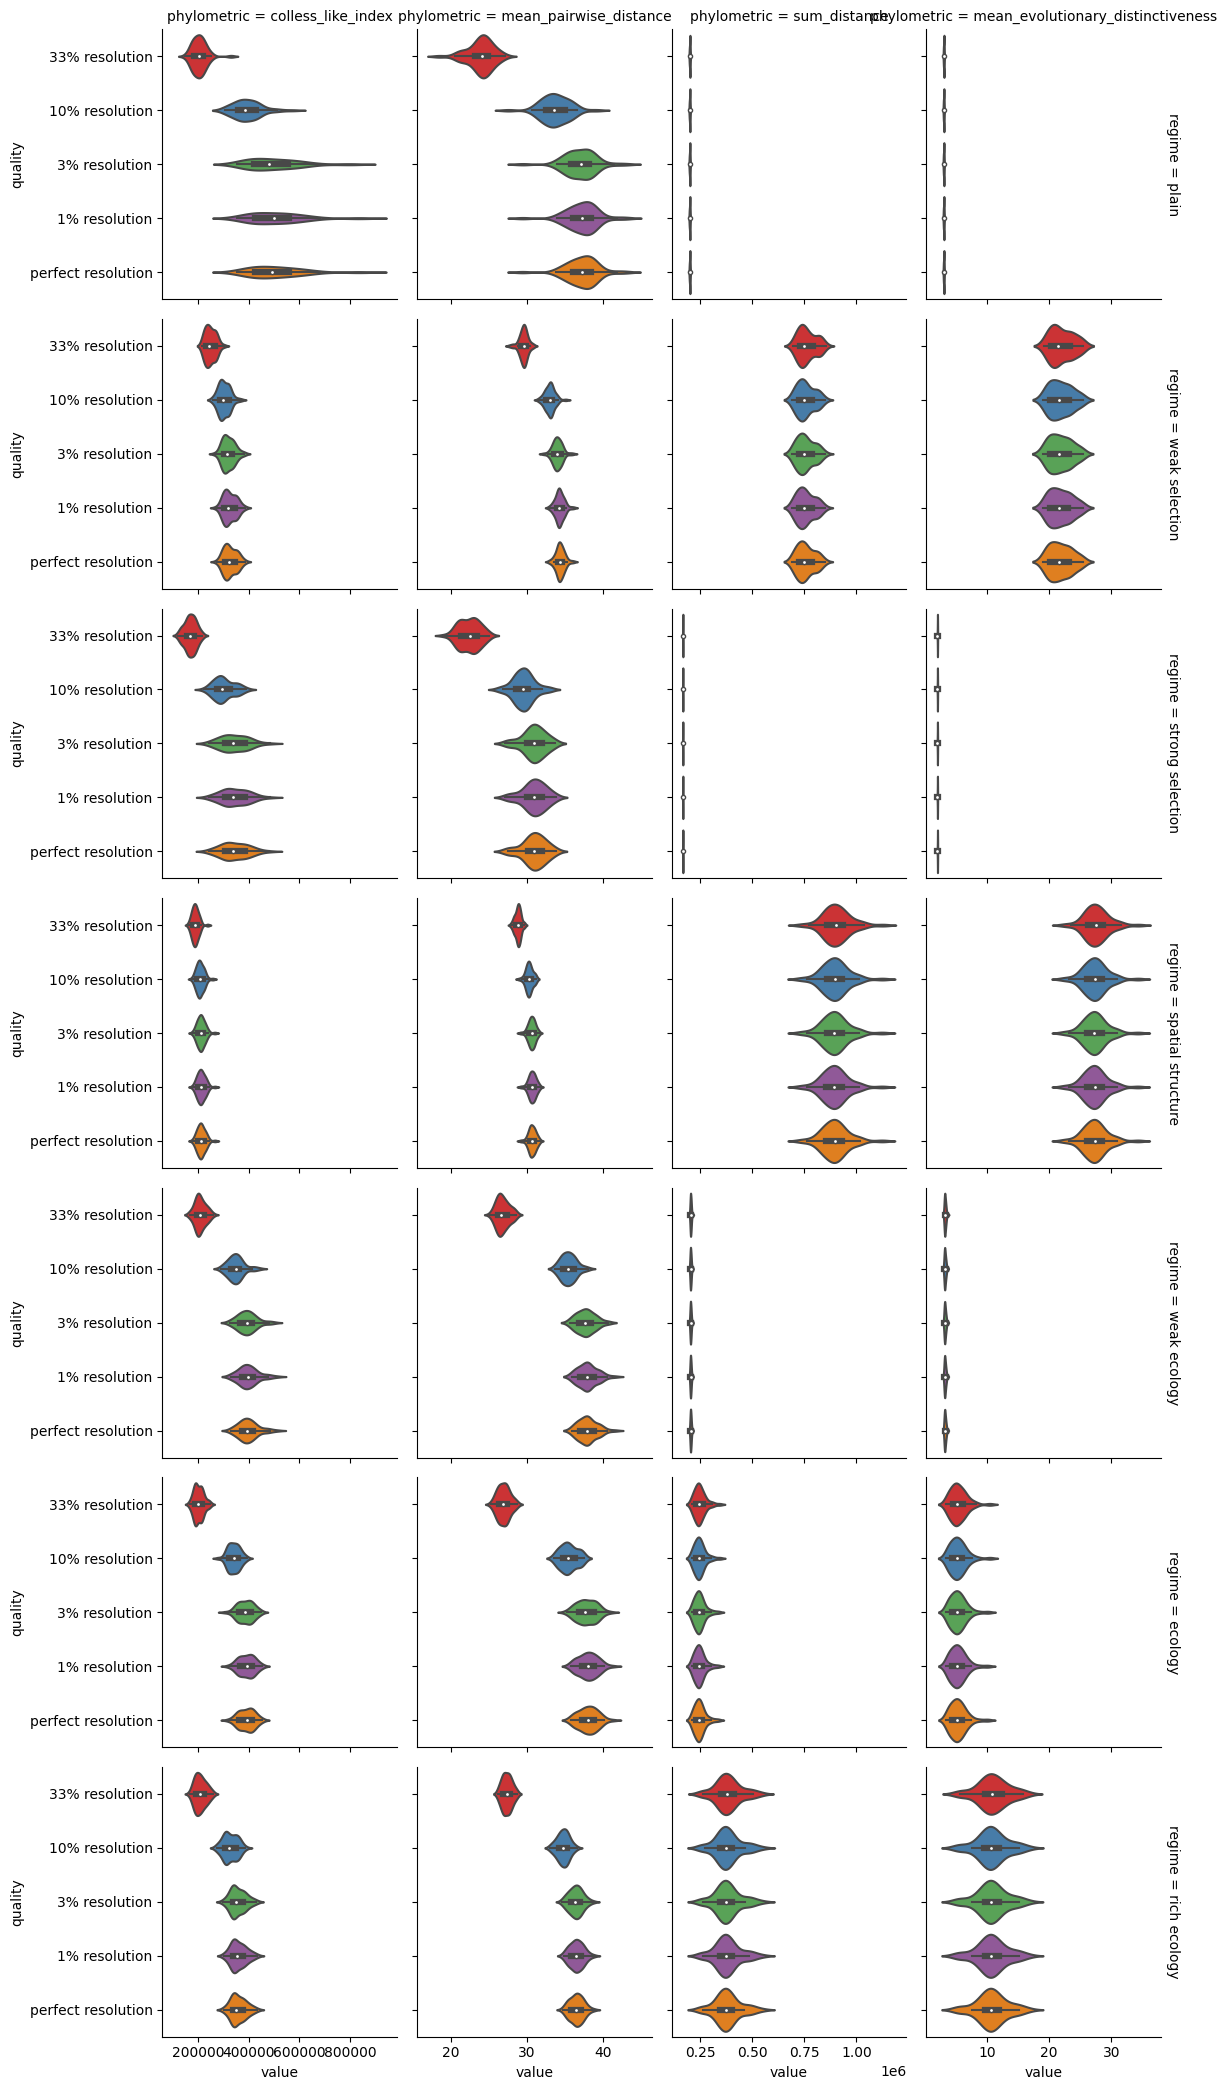

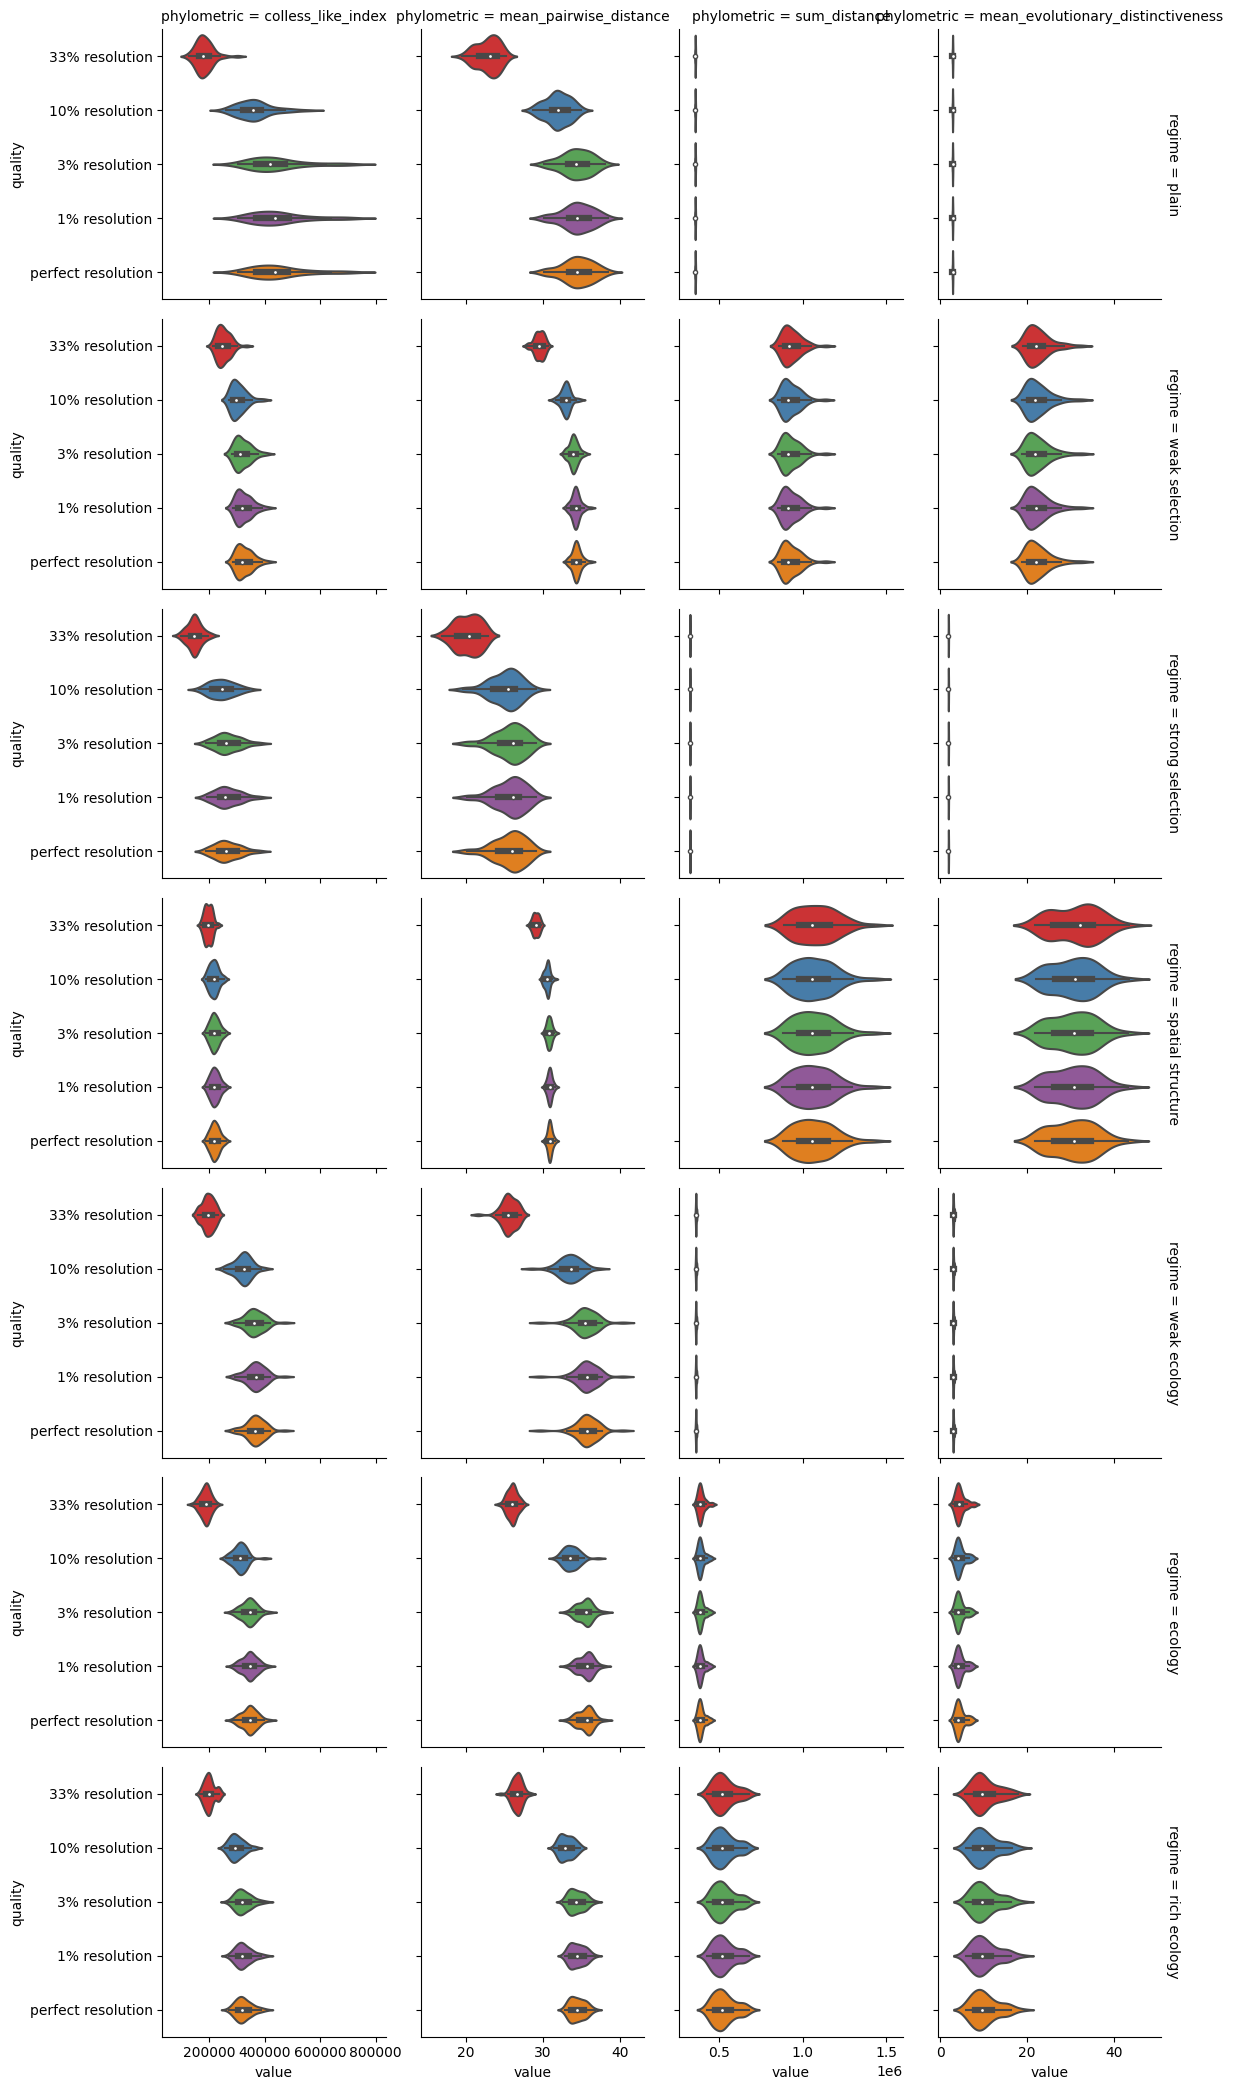

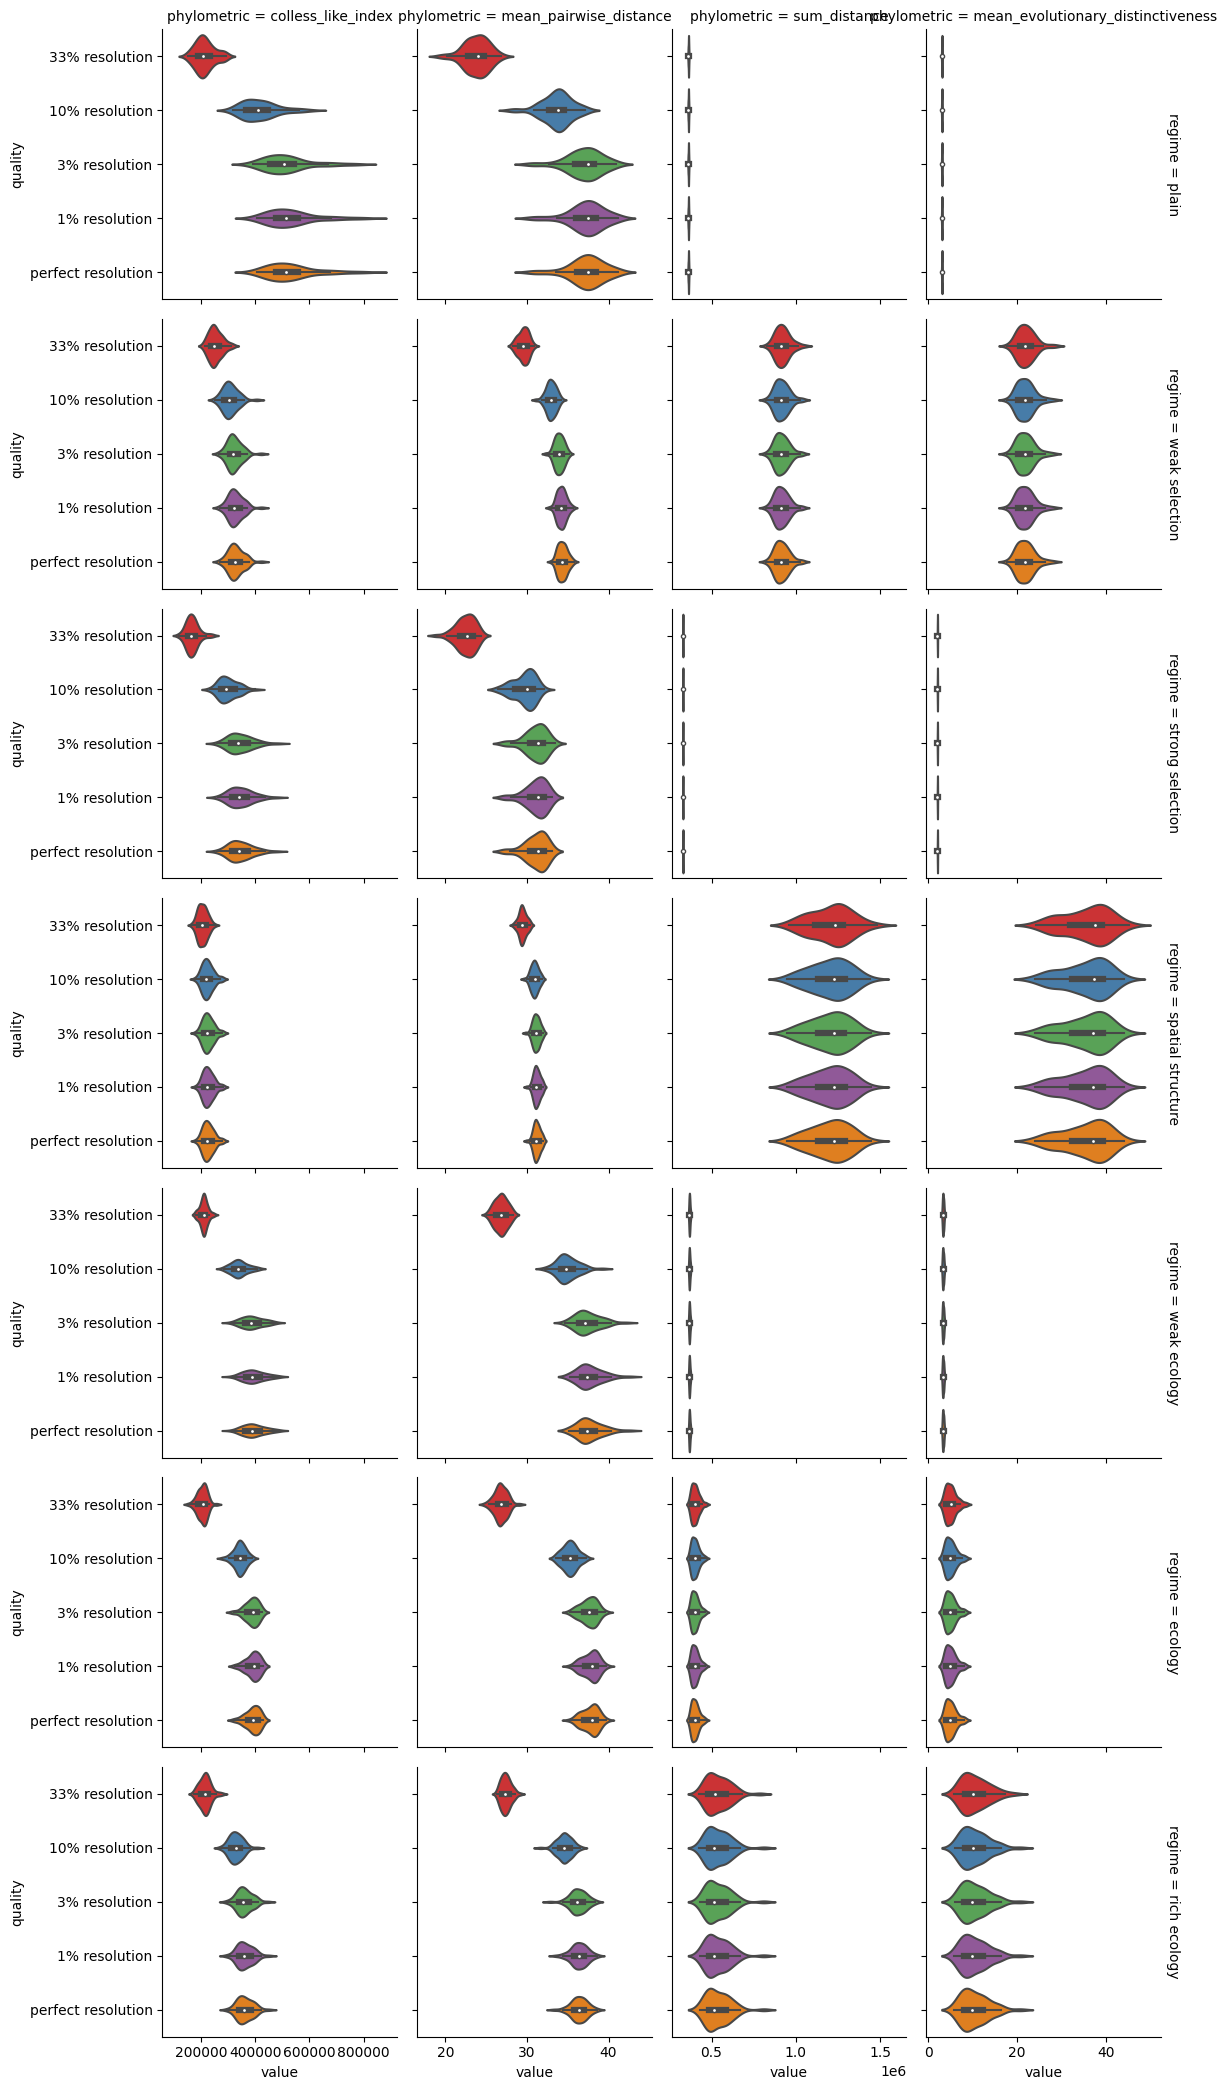

In [19]:
def make_do_plot(plotter):
    def do_plot(data, col, row, x, y):
        g = sns.FacetGrid(
            data,
            col=col,
            row=row,
            row_order=[
                "plain",
                "weak selection",
                "strong selection",
                "spatial structure",
                "weak ecology",
                "ecology",
                "rich ecology",
            ],
            sharex="col",
            margin_titles=True,
        )
        g.map(
            plotter,
            x,
            y,
            order=[
                "33% resolution",
                "10% resolution",
                "3% resolution",
                "1% resolution",
                "perfect resolution",
            ],
            palette=sns.color_palette("Set1", 5),
        )

    return do_plot


for viz, (group, group_df) in it.product(
    [
        sns.barplot,
        sns.boxplot,
        sns.violinplot,
    ],
    melted_df.groupby(sensitivity_analysis_variables),
):
    do_plot = make_do_plot(viz)
    do_plot.__name__ = viz.__name__
    tp.tee(
        do_plot,
        data=group_df,
        col="phylometric",
        row="regime",
        x="value",
        y="quality",
        teeplot_outattrs=dict(
            zip(sensitivity_analysis_variables, group),
        ),
    )


# stats: comparison against perfect quality


In [20]:
records = []
for phylometric in phylometrics:
    for group, group_df in df.groupby(
        ["regime", *sensitivity_analysis_variables], as_index=False
    ):
        for quality in group_df["quality"].unique():
            if quality == "perfect resolution":
                continue
            kw_result, n = scipy_stats.wilcoxon(
                group_df[group_df["quality"] == "perfect resolution"][
                    phylometric
                ],
                group_df[group_df["quality"] == quality][phylometric],
            ), ip.pophomogeneous(group_df.groupby(["quality"]).count()["a"])
            records.append(
                {
                    **{"quality": quality, "n": n, "phylometric": phylometric},
                    **dict(zip(["statistic", "p"], kw_result)),
                    **dict(
                        zip(["regime", *sensitivity_analysis_variables], group)
                    ),
                }
            )

with pd.option_context("display.max_colwidth", None, "display.max_rows", None):
    out_df = (
        pd.DataFrame.from_records(records)
        .sort_values(
            [*sensitivity_analysis_variables, "regime", "phylometric"],
        )
        .reset_index(drop=True)
    )
    display(out_df)
    os.makedirs("outdata", exist_ok=True)
    out_df.to_csv(
        "outdata/a=phylostatistics-comparison-between-resolutions-allpairs-wilcox+ext=.csv",
        index=False,
    )


quality   n                        phylometric  statistic  \
0     1% resolution  50                 colless_like_index      614.0   
1    33% resolution  50                 colless_like_index        0.0   
2    10% resolution  50                 colless_like_index      124.0   
3     3% resolution  50                 colless_like_index      569.0   
4     1% resolution  50  mean_evolutionary_distinctiveness      633.0   
5    33% resolution  50  mean_evolutionary_distinctiveness      621.0   
6    10% resolution  50  mean_evolutionary_distinctiveness      629.0   
7     3% resolution  50  mean_evolutionary_distinctiveness      599.0   
8     1% resolution  50             mean_pairwise_distance      632.0   
9    33% resolution  50             mean_pairwise_distance        0.0   
10   10% resolution  50             mean_pairwise_distance       86.0   
11    3% resolution  50             mean_pairwise_distance      541.0   
12    1% resolution  50                       sum_distance      625.0   
13   33% resolution  50                       sum_distance      621.0   
14   10% resolution  50                       sum_distance      637.0   
15    3% resolution  50                       sum_distance      606.0   
16   10% resolution  50                 colless_like_index      160.0   
17    1% resolution  50                 colless_like_index      635.0   
18    3% resolution  50                 colless_like_index      606.0   
19   33% resolution  50                 colless_like_index        0.0   
20   10% resolution  50  mean_evolutionary_distinctiveness      538.0   
21    1% resolution  50  mean_evolutionary_distinctiveness      598.0   
22    3% resolution  50  mean_evolutionary_distinctiveness      564.0   
23   33% resolution  50  mean_evolutionary_distinctiveness      588.0   
24   10% resolution  50             mean_pairwise_distance      122.0   
25    1% resolution  50             mean_pairwise_distance      614.0   
26    3% resolution  50             mean_pairwise_distance      570.0   
27   33% resolution  50             mean_pairwise_distance        0.0   
28   10% resolution  50                       sum_distance      532.0   
29    1% resolution  50                       sum_distance      593.0   
30    3% resolution  50                       sum_distance      564.0   
31   33% resolution  50                       sum_distance      599.0   
32   10% resolution  50                 colless_like_index      189.0   
33    1% resolution  50                 colless_like_index      634.0   
34    3% resolution  50                 colless_like_index      628.0   
35   33% resolution  50                 colless_like_index        0.0   
36   10% resolution  50  mean_evolutionary_distinctiveness      630.0   
37    1% resolution  50  mean_evolutionary_distinctiveness      606.0   
38    3% resolution  50  mean_evolutionary_distinctiveness      637.0   
39   33% resolution  50  mean_evolutionary_distinctiveness      609.0   
40   10% resolution  50             mean_pairwise_distance      106.0   
41    1% resolution  50             mean_pairwise_distance      616.0   
42    3% resolution  50             mean_pairwise_distance      617.0   
43   33% resolution  50             mean_pairwise_distance        0.0   
44   10% resolution  50                       sum_distance      630.0   
45    1% resolution  50                       sum_distance      605.0   
46    3% resolution  50                       sum_distance      637.0   
47   33% resolution  50                       sum_distance      609.0   
48   33% resolution  50                 colless_like_index        1.0   
49   10% resolution  50                 colless_like_index      467.0   
50    3% resolution  50                 colless_like_index      632.0   
51    1% resolution  50                 colless_like_index      619.0   
52   33% resolution  50  mean_evolutionary_distinctiveness      556.0   
53   10% resolution  50  mean_evolutionary_distinctiveness      634.0 

teeplots/./epoch=0+hue=quality-threshold+mut_distn=np.random.exponential+viz=heatmap+x=regime+y=phylometric+ext=.pdf


teeplots/./epoch=0+hue=quality-threshold+mut_distn=np.random.exponential+viz=heatmap+x=regime+y=phylometric+ext=.png


teeplots/./epoch=0+hue=quality-threshold+mut_distn=np.random.standard_normal+viz=heatmap+x=regime+y=phylometric+ext=.pdf


teeplots/./epoch=0+hue=quality-threshold+mut_distn=np.random.standard_normal+viz=heatmap+x=regime+y=phylometric+ext=.png


teeplots/./epoch=2+hue=quality-threshold+mut_distn=np.random.exponential+viz=heatmap+x=regime+y=phylometric+ext=.pdf


teeplots/./epoch=2+hue=quality-threshold+mut_distn=np.random.exponential+viz=heatmap+x=regime+y=phylometric+ext=.png


teeplots/./epoch=2+hue=quality-threshold+mut_distn=np.random.standard_normal+viz=heatmap+x=regime+y=phylometric+ext=.pdf


teeplots/./epoch=2+hue=quality-threshold+mut_distn=np.random.standard_normal+viz=heatmap+x=regime+y=phylometric+ext=.png


teeplots/./epoch=7+hue=quality-threshold+mut_distn=np.random.exponential+viz=heatmap+x=regime+y=phylometric+ext=.pdf
teeplots/./epoch=7+hue=quality-threshold+mut_distn=np.random.exponential+viz=heatmap+x=regime+y=phylometric+ext=.png


teeplots/./epoch=7+hue=quality-threshold+mut_distn=np.random.standard_normal+viz=heatmap+x=regime+y=phylometric+ext=.pdf


teeplots/./epoch=7+hue=quality-threshold+mut_distn=np.random.standard_normal+viz=heatmap+x=regime+y=phylometric+ext=.png


regime                        phylometric  quality threshold  \
0             ecology                 colless_like_index                  3   
1             ecology  mean_evolutionary_distinctiveness                 33   
2             ecology             mean_pairwise_distance                  3   
3             ecology                       sum_distance                 33   
4               plain                 colless_like_index                  3   
5               plain  mean_evolutionary_distinctiveness                 33   
6               plain             mean_pairwise_distance                  3   
7               plain                       sum_distance                 33   
8        rich ecology                 colless_like_index                  3   
9        rich ecology  mean_evolutionary_distinctiveness                 33   
10       rich ecology             mean_pairwise_distance                  3   
11       rich ecology                       sum_distance                 33   
12  spatial structure                 colless_like_index                 10   
13  spatial structure  mean_evolutionary_distinctiveness                 33   
14  spatial structure             mean_pairwise_distance                  3   
15  spatial structure                       sum_distance                 33   
16   strong selection                 colless_like_index                  3   
17   strong selection  mean_evolutionary_distinctiveness                 33   
18   strong selection             mean_pairwise_distance                  3   
19   strong selection                       sum_distance                 33   
20       weak ecology                 colless_like_index                  3   
21       weak ecology  mean_evolutionary_distinctiveness                 33   
22       weak ecology             mean_pairwise_distance                  3   
23       weak ecology                       sum_distance                 33   
24     weak selection                 colless_like_index                  3   
25     weak selection  mean_evolutionary_distinctiveness                 33   
26     weak selection             mean_pairwise_distance                  1   
27     weak selection                       sum_distance                 33   

    epoch                  mut_distn  
0       7  np.random.standard_normal  
1       7  np.random.standard_normal  
2       7  np.random.standard_normal  
3       7  np.random.standard_normal  
4       7  np.random.standard_normal  
5       7  np.random.standard_normal  
6       7  np.random.standard_normal  
7       7  np.random.standard_normal  
8       7  np.random.standard_normal  
9       7  np.random.standard_normal  
10      7  np.random.standard_normal  
11      7  np.random.standard_normal  
12      7  np.random.standard_normal  
13      7  np.random.standard_normal  
14      7  np.random.standard_normal  
15      7  np.random.standard_normal  
16      7  np.random.standard_normal  
17      7  np.random.standard_normal  
18      7  np.random.standard_normal  
19      7  np.random.standard_normal  
20      7  np.random.standard_normal  
21      7  np.random.standard_normal  
22      7  np.random.standard_normal  
23      7  np.random.standard_normal  
24      7  np.random.standard_normal  
25      7  np.random.standard_normal  
26      7  np.random.standard_normal  
27      7  np.random.standard_normal

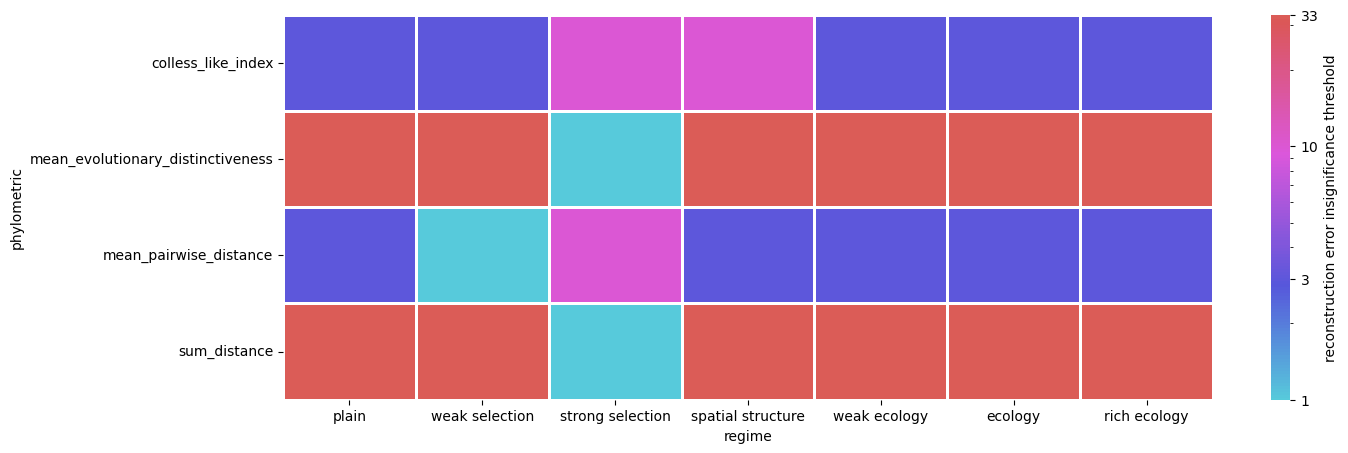

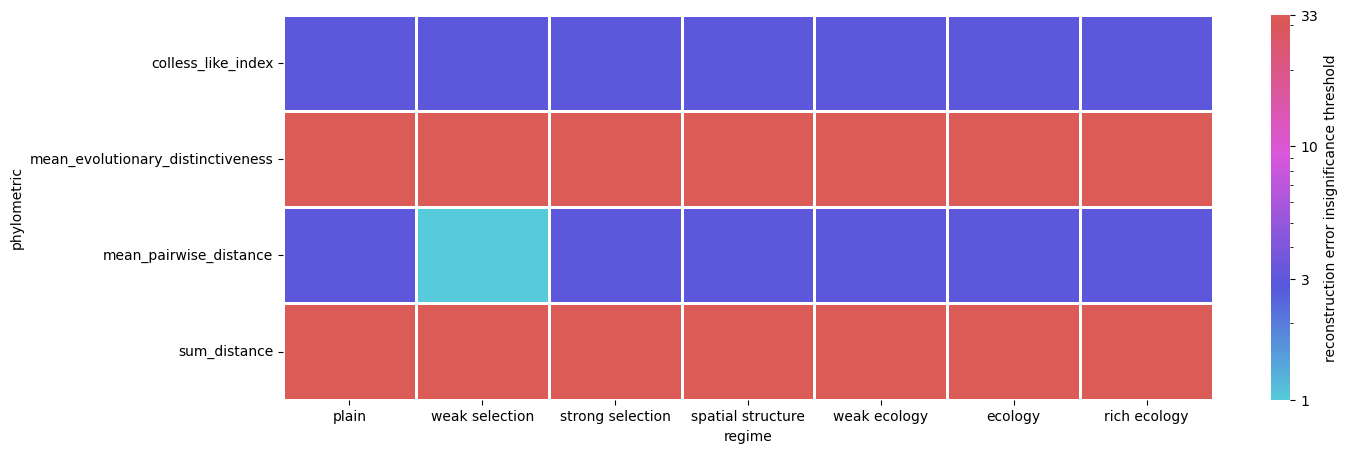

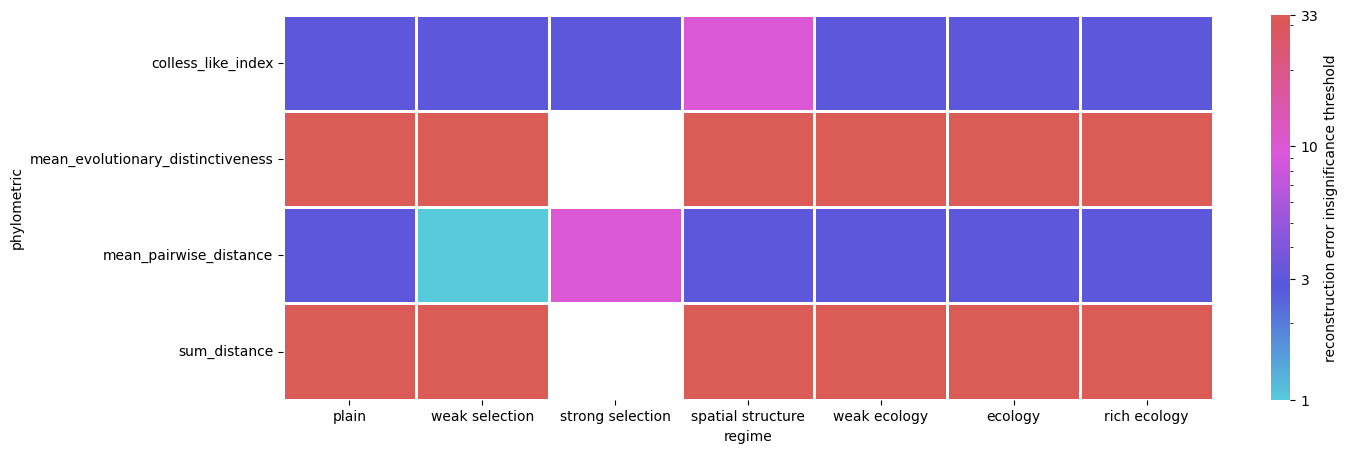

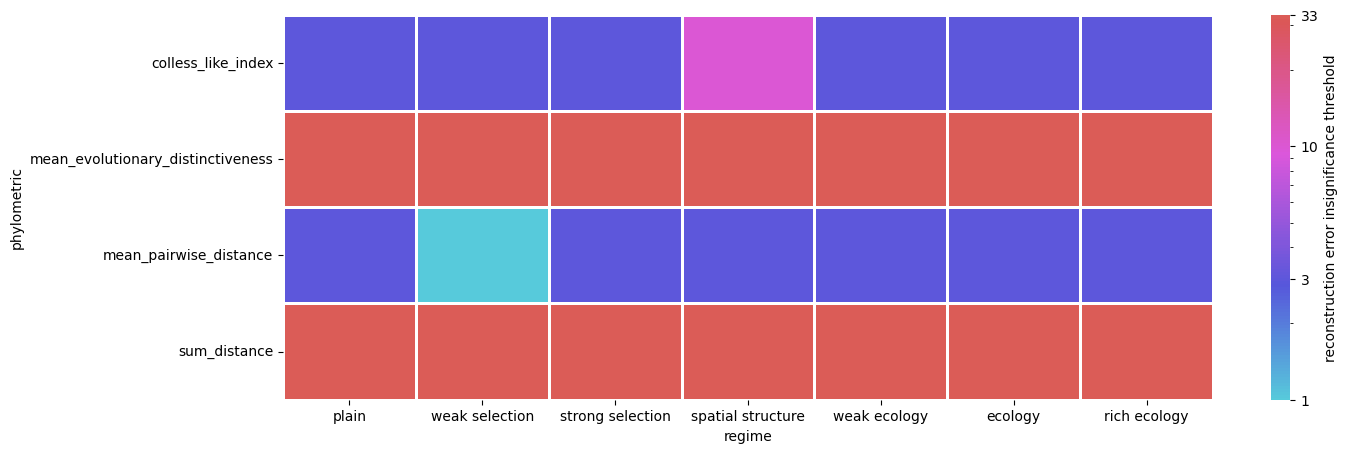

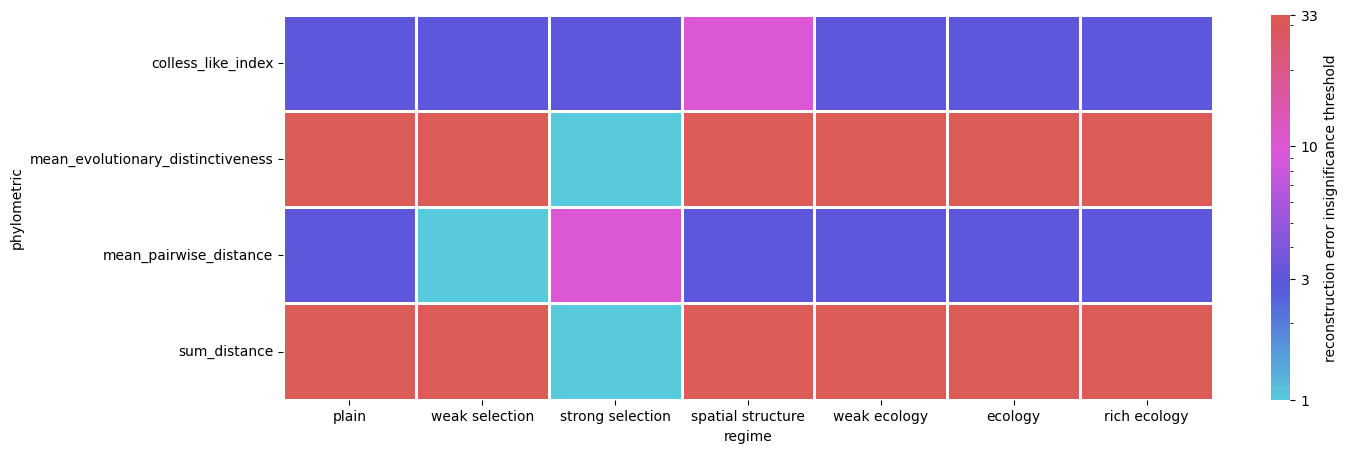

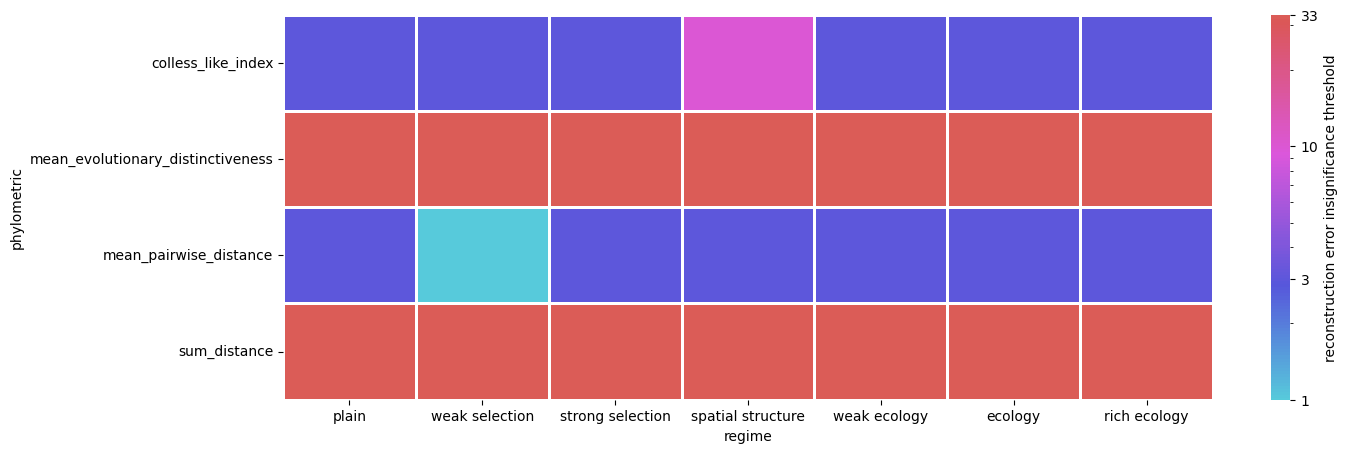

In [21]:
for group, group_df in out_df.groupby(
    sensitivity_analysis_variables, as_index=False
):
    group_df["quality threshold"] = group_df["quality"]
    group_df.loc[group_df["p"] > 0.05, "quality threshold"] = ""
    summarized_df = (
        group_df.groupby(["regime", "phylometric"])
        .agg(
            {
                "quality threshold": lambda subgroup: (
                    np.nan
                    if "1% resolution" in set(subgroup)
                    else 1
                    if "3% resolution" in set(subgroup)
                    else 3
                    if "10% resolution" in set(subgroup)
                    else 10
                    if "33% resolution" in set(subgroup)
                    else 33
                ),
                "epoch": lambda subgroup: ip.pophomogeneous(subgroup),
                "mut_distn": lambda subgroup: ip.pophomogeneous(subgroup),
            }
        )
        .reset_index()
    )

    matrix = summarized_df.pivot(
        index="phylometric",
        columns="regime",
        values="quality threshold",
    )
    matrix = matrix[
        sorted(
            matrix.columns,
            key=[
                "plain",
                "weak selection",
                "strong selection",
                "spatial structure",
                "weak ecology",
                "ecology",
                "rich ecology",
            ].index,
        )
    ]

    fig, ax = plt.subplots(figsize=(15, 5))
    formatter = mpl.ticker.ScalarFormatter(useMathText=True)
    formatter.set_scientific(False)
    tp.tee(
        sns.heatmap,
        matrix,
        linewidths=2,
        norm=mpl.colors.LogNorm(),
        cmap=sns.color_palette("hls", as_cmap=True),
        center=0,
        cbar_kws={
            "label": "reconstruction error insignificance threshold",
            "ticks": [1, 3, 10, 33],
            "format": formatter,
        },
        teeplot_outattrs={
            **dict(
                zip(sensitivity_analysis_variables, group),
            ),
            **{
                "hue": "quality-threshold",
                "x": "regime",
                "y": "phylometric",
            },
        },
    )

summarized_df
